## Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы): train.csv test.csv

Задание: 
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры). 
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная: Price
Метрика качества: R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:
R2 > 0.6
Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv 
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки сдачи: Cдать проект нужно в течение 72 часов после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

Рекомендации для файла с кодом (ipynb):
Файл должен содержать заголовки и комментарии (markdown)
Повторяющиеся операции лучше оформлять в виде функций
Не делать вывод большого количества строк таблиц (5-10 достаточно)
По возможности добавлять графики, описывающие данные (около 3-5)
Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
Весь проект должен быть в одном скрипте (файл ipynb).
Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.

Описание датасета: 
Id - идентификационный номер квартиры 

DistrictId - идентификационный номер района 

Rooms - количество комнат 

Square - площадь 

LifeSquare - жилая площадь 

KitchenSquare - площадь кухни 

Floor - этаж 

HouseFloor - количество этажей в доме 

HouseYear - год постройки дома 

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности 

Social_1, Social_2, Social_3 - социальные показатели местности 

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья 

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров 

Price - цена квартиры

# РЕШЕНИЕ

**Загрузим нужные библиотеки**

In [2873]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})
%matplotlib inline

from scipy.stats import norm
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

**Пути к директориям и файлам**

In [2874]:
TRAIN_DATASET_PATH = '/Users/ekaterina/Downloads/project_task/train.csv'
TEST_DATASET_PATH = '/Users/ekaterina/Downloads/project_task/test.csv'

**Загрузим файлы к проекту: train.csv test.csv**

In [2875]:
train = pd.read_csv(TRAIN_DATASET_PATH)
test = pd.read_csv(TEST_DATASET_PATH)
print('Материалы к проекту загружены!\n')
print(f'Размер массива Train:\n{train.shape[0]}\tквартир and {train.shape[1]} признаков\n')
print(f'Размер массива Test:\n{test.shape[0]}\tквартир and {test.shape[1]} признаков')

Материалы к проекту загружены!

Размер массива Train:
10000	квартир and 20 признаков

Размер массива Test:
5000	квартир and 19 признаков


**Посмотрим первые 5 строк в датасетах:**

In [2876]:
train.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [2877]:
test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            1.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199         B         B        11      2748   
1         1.0       1977   0.075779         B         B         6      1437   
2         5.0       1909   0.000000         B         B        30      7538   
3        22.0       2007   0.101872         B         B        23      4583   
4        17.0       2017   0.072158         B         B         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         1           NaN            0        0       B  
1         3           NaN            0        2       B  
2        87        4702.0            5        5       B  
3         3           NaN            3        3       B  
4         1           NaN            0        0       A

Посмотрим количество заполненных значений и типы данных:

In [2878]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [2879]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Оптимизируем использование памяти:

In [2984]:
train['Rooms'] = train['Rooms'].astype('int32')
train['Floor'] = train['Floor'].astype('int32')
train['HouseFloor'] = train['HouseFloor'].astype('int32')
train['HouseYear'] = train['HouseYear'].astype('int32')
train['Square'] = train['Square'].astype('float32')
train['LifeSquare'] = train['LifeSquare'].astype('float32')
train['KitchenSquare'] = train['KitchenSquare'].astype('float32')
train['Price'] = train['Price'].astype('float32')

In [2881]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int32  
 2   Rooms          10000 non-null  int32  
 3   Square         10000 non-null  float32
 4   LifeSquare     7887 non-null   float32
 5   KitchenSquare  10000 non-null  float32
 6   Floor          10000 non-null  int32  
 7   HouseFloor     10000 non-null  int32  
 8   HouseYear      10000 non-null  int32  
 9   Ecology_1      10000 non-null  float32
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int32  
 13  Social_2       10000 non-null  int32  
 14  Social_3       10000 non-null  int32  
 15  Healthcare_1   5202 non-null   float32
 16  Helthcare_2    10000 non-null  int32  
 17  Shops_1        10000 non-null  int32  
 18  Shops_2

In [2882]:
train.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315712    37.199596   
std     4859.01902     43.587592      0.839512     21.058718    86.241112   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774879    22.769833   
50%     8394.50000     36.000000      2.000000     52.513309    32.781261   
75%    12592.50000     75.000000      2.000000     65.900627    45.128803   
max    16798.00000    209.000000     19.000000    641.065186  7480.592285   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.561113      5.241148      6.775974  2.005003e+05      0.119026   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904419      1.319500   
std       17.532614   4006.799803     23.831875   1021.518982      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214139.218750  
std        4.806341   92872.304688  
min        0.000000   59174.777344  
25%        1.000000  153872.628906  
50%        3.000000  192269.648438  
75%        6.000000  249135.460938  
max       23.000000  633233.437500

In [2883]:
train.dtypes.value_counts()

int32      10
float32     6
object      3
int64       1
dtype: int64

In [2884]:
train.shape[1]-1 == test.shape[1]

True

# Поработаем с данными:

0. Изменим тип признака id, чтобы не учитывать его в обучении модели 

In [2885]:
train['Id'] = train['Id'].astype(str)

In [2886]:
#train = train[train.columns[1:]]

1. HouseYear

In [2887]:
train[train['HouseYear']>2020]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1497  10814         109      1  37.265072   20.239714            9.0      9   
4189  11607         147      2  44.791836   28.360394            5.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1497          12   20052011   0.136330         B         B        30   
4189           9       4968   0.319809         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1497      6141        10         262.0            3        6       B   
4189      4756        16        2857.0            5        8       B   

              Price  
1497  254084.531250  
4189  243028.609375

In [2888]:
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2)
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968

In [2889]:
train['HouseYear'].unique()

array([1969, 1978, 1968, 1977, 1976, 2011, 1960, 2014, 1973, 1959, 1999,
       1980, 1979, 1983, 2001, 2012, 2002, 1996, 1964, 2018, 1972, 1965,
       1984, 1961, 1971, 1963, 2017, 1970, 1981, 2003, 2016, 1991, 1975,
       2006, 2009, 1985, 1974, 1994, 2000, 1987, 1998, 2005, 1990, 1982,
       1997, 2015, 2008, 2010, 2004, 2007, 1967, 1957, 1962, 1993, 1966,
       1955, 1937, 1992, 1954, 1995, 2019, 1948, 1986, 2013, 1989, 1958,
       1938, 1956, 1988, 2020, 1951, 1952, 1935, 1914, 1932, 1950, 1917,
       1918, 1940, 1942, 1939, 1934, 1931, 1919, 1912, 1953, 1936, 1947,
       1929, 1930, 1933, 1941, 1916, 1910, 1928], dtype=int32)

2. Square

In [2890]:
train.loc[(train['Square'] < 3)].transpose()

1608       4853        6392       8283      9294
Id                10202       3224       14786      15744      6782
DistrictId            6         27           1         34        45
Rooms                 1          0           1          1         1
Square          2.59635    2.37725     1.13686    1.98894   2.95431
LifeSquare      4.60494   0.873147     4.52574    2.64222   5.25728
KitchenSquare         1          0           1          1         1
Floor                 3          1           3         21         3
HouseFloor           25          0           1          4         1
HouseYear          2014       1977        1977       1977      1977
Ecology_1      0.243205  0.0176471  0.00712232  0.0697534  0.195781
Ecology_2             B          B           B          B         B
Ecology_3             B          B           B          B         B
Social_1              5          2           1         53        23
Social_2           1564        469         264      13670      5212
Social_3              0          0           0          4         6
Healthcare_1        540        NaN         NaN        NaN       NaN
Helthcare_2           0          0           0          1         3
Shops_1               0          0           1         11         2
Shops_2               B          B           B          B         B
Price            137598     126597      181435     458379    438005

Удалим строки с квартирами площадью меньше 3 м2

In [2891]:
mask = train["Square"] < 3
#mask = train_df["Square"] < train_df["KitchenSquare"] + train_df["LifeSquare"]

In [2892]:
mask

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Square, Length: 10000, dtype: bool

In [2893]:
train = train.drop(1608, axis=0)
train = train.drop(6392, axis=0)
train = train.drop(4853, axis=0)
train = train.drop(8283, axis=0)
train = train.drop(9294, axis=0)

In [2894]:
train.loc[(train['Square'] < 3)]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

Квартиры с площадью больше, чем 600м2 скорее всего опечатки, разделим на 10

In [2895]:
train.loc[(train['Square'] > 600)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
4262     28           9      2  604.705994         NaN            1.0     17   
6977  11602          30      2  641.065186  638.163208           10.0     20   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4262          18       1977   0.161532         B         B        25   
6977          19       2019   0.000078         B         B        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4262      5648         1          30.0            2        4       B   
6977      6398       141        1046.0            3       23       B   

            Price  
4262  187717.2500  
6977  133529.6875

In [2896]:
train.loc[train['Square'] > 600, 'Square'] = train.loc[train['Square'] > 600, 'Square']/10
train.loc[train['LifeSquare'] > 600, 'LifeSquare'] = train.loc[train['LifeSquare'] > 600, 'LifeSquare']/10

In [2897]:
train.loc[4262]

Id                     28
DistrictId              9
Rooms                   2
Square            60.4706
LifeSquare            NaN
KitchenSquare           1
Floor                  17
HouseFloor             18
HouseYear            1977
Ecology_1        0.161532
Ecology_2               B
Ecology_3               B
Social_1               25
Social_2             5648
Social_3                1
Healthcare_1           30
Helthcare_2             2
Shops_1                 4
Shops_2                 B
Price              187717
Name: 4262, dtype: object

In [2898]:
train.loc[6977]

Id                     11602
DistrictId                30
Rooms                      2
Square               64.1065
LifeSquare           63.8163
KitchenSquare             10
Floor                     20
HouseFloor                19
HouseYear               2019
Ecology_1        7.81528e-05
Ecology_2                  B
Ecology_3                  B
Social_1                  22
Social_2                6398
Social_3                 141
Healthcare_1            1046
Helthcare_2                3
Shops_1                   23
Shops_2                    B
Price                 133530
Name: 6977, dtype: object

Квартиры с площадью мельше, чем 6м2 скорее всего опечатки, умножим на 10

In [2899]:
train.loc[(train['Square'] < 6)].transpose()

212        1316      3280      3413      4900        8030  \
Id                 1748      11526     10527      9487      4504       13265   
DistrictId           88         27        27         5        27           1   
Rooms                 2          1         1         1         3           3   
Square          5.49706     4.6335   4.38073   5.12922   4.39033     4.82368   
LifeSquare      67.6287    1.96997   40.8058   5.54946   5.61077      79.768   
KitchenSquare         1          1         1         1         1           0   
Floor                24         18        10         1         8           6   
HouseFloor           22          1        17         1        19          17   
HouseYear          1977       1977      2013      1977      2016        1977   
Ecology_1      0.127376  0.0116541  0.211401  0.150818  0.211401  0.00712232   
Ecology_2             B          B         B         B         B           B   
Ecology_3             B          B         B         B         B           B   
Social_1             43          4         9        16         9           1   
Social_2           8429        915      1892      3433      1892         264   
Social_3              3          0         0         4         0           0   
Healthcare_1        NaN        NaN       NaN      2643       NaN         NaN   
Helthcare_2           3          0         0         4         0           0   
Shops_1               9          0         1         5         1           1   
Shops_2               B          B         B         B         B           B   
Price            412511     107604   97560.7    369472    161379      237717   

                   9613  
Id                 7657  
DistrictId           38  
Rooms                 1  
Square          4.50278  
LifeSquare      4.61855  
KitchenSquare         1  
Floor                28  
HouseFloor            1  
HouseYear          1977  
Ecology_1      0.060753  
Ecology_2             B  
Ecology_3             B  
Social_1             15  
Social_2           2787  
Social_3              2  
Healthcare_1        520  
Helthcare_2           0  
Shops_1               7  
Shops_2               B  
Price            483284

In [2900]:
train.loc[train['Square']  < 6, 'Square'] = train.loc[train['Square'] < 6, 'Square']*10

3. LifeSquare

Заполним недостающие данные по жилой площади и показатели местности, связанные с охраной здоровья

In [2901]:
train[train['LifeSquare'].isnull()]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
7     11993          74      2   80.312927         NaN            0.0     14   
8      5172           1      2   64.511436         NaN            1.0      9   
21    11935          27      2   64.711838         NaN            1.0     15   
23     6641          54      3  118.907608         NaN            0.0      2   
25     5073          74      2   82.667915         NaN            1.0     16   
...     ...         ...    ...         ...         ...            ...    ...   
9985  16159          27      1   38.968338         NaN            1.0     10   
9986   2996           1      2   64.994247         NaN            1.0      9   
9987  15623          23      2   55.620090         NaN            0.0      2   
9994   4158          23      2   64.864197         NaN            1.0     17   
9997   5123          27      1   47.939007         NaN            1.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
7              0       1977   0.075779         B         B         6   
8             17       1977   0.007122         B         B         1   
21             1       1977   0.211401         B         B         9   
23             0       1977   0.006076         B         B        30   
25            17       1977   0.075779         B         B         6   
...          ...        ...        ...       ...       ...       ...   
9985           1       1977   0.211401         B         B         9   
9986          22       1977   0.007122         B         B         1   
9987           4       1977   0.034656         B         B         0   
9994          17       1977   0.075779         B         B         6   
9997          16       2015   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
7         1437         3           NaN            0        2       B   
8          264         0           NaN            0        1       B   
21        1892         0           NaN            0        1       B   
23        5285         0         645.0            6        6       B   
25        1437         3           NaN            0        2       B   
...        ...       ...           ...          ...      ...     ...   
9985      1892         0           NaN            0        1       B   
9986       264         0           NaN            0        1       B   
9987       168         0           NaN            0        0       B   
9994      1437         3           NaN            0        2       B   
9997       629         1           NaN            0        0       A   

              Price  
7     221244.156250  
8     229102.796875  
21    127200.023438  
23    571069.062500  
25    244145.828125  
...             ...  
9985   95529.570312  
9986  200332.515625  
9987  115797.554688  
9994  171323.515625  
9997  159143.812500  

[2113 rows x 20 columns]

In [2902]:
train.loc[(train['LifeSquare'].isnull(), 'LifeSquare')] = train['Square']-10

In [2903]:
train.loc[(train['LifeSquare'] - train['Square'] >= 3)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
52     2301           1      2  61.400055   65.224602            0.0     17   
123    8753          25      3  85.952309   89.803749            1.0      4   
212    1748          88      2  54.970612   67.628716            1.0     24   
236    3916           1      1  43.084412   47.071617            1.0      9   
342    7815           6      1  74.609612   78.533295            1.0     16   
...     ...         ...    ...        ...         ...            ...    ...   
9465   2430          58      1  46.458641   50.663483            1.0      9   
9484  10374          54      2  78.061119   82.171478            1.0     10   
9626   3742           1      1  53.258610   56.655125            0.0      6   
9793   5766           1      3  80.006744   83.793060            0.0     17   
9799   7483          27      1  37.590771   41.074409            1.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
52            22       2016   0.007122         B         B         1   
123            3       2017   0.069753         B         B        53   
212           22       1977   0.127376         B         B        43   
236            7       2017   0.007122         B         B         1   
342            1       1977   0.243205         B         B         5   
...          ...        ...        ...       ...       ...       ...   
9465           9       1977   0.437885         B         B        23   
9484           1       2017   0.006076         B         B        30   
9626          17       1977   0.007122         B         B         1   
9793          17       1977   0.007122         B         B         1   
9799          19       2017   0.211401         B         B         9   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
52         264         0           NaN            0        1       B   
123      13670         4           NaN            1       11       B   
212       8429         3           NaN            3        9       B   
236        264         0           NaN            0        1       B   
342       1564         0         540.0            0        0       B   
...        ...       ...           ...          ...      ...     ...   
9465      5735         3        1084.0            0        5       B   
9484      5285         0         645.0            6        6       B   
9626       264         0           NaN            0        1       B   
9793       264         0           NaN            0        1       B   
9799      1892         0           NaN            0        1       B   

              Price  
52    199215.453125  
123   309688.593750  
212   412511.093750  
236   169749.171875  
342   216181.640625  
...             ...  
9465  104304.242188  
9484  426958.093750  
9626  161799.234375  
9793  235519.718750  
9799   95145.921875  

[66 rows x 20 columns]

In [2904]:
train.loc[(train['Square'] < train['LifeSquare'], 'LifeSquare')] = train['Square']-10

In [2905]:
train.loc[(train['Square'] < train['KitchenSquare'])]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1064  14656          62      1  47.100719   46.447960         2014.0      4   
5149  13703          42      1  38.071693   19.723547           73.0      9   
7088   6569          27      1  38.220257   18.716856           84.0      4   
8584  14679          81      1  32.276665   19.278395         1970.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1064           1       2014   0.072158         B         B         2   
5149          10       2006   0.158249         B         B        21   
7088          17       2018   0.011654         B         B         4   
8584           1       1977   0.006076         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1064       629         1           NaN            0        0       A   
5149      5731         0           NaN            1        0       B   
7088       915         0           NaN            0        0       B   
8584      5285         0         645.0            6        6       B   

              Price  
1064  108337.484375  
5149  160488.031250  
7088   99079.960938  
8584  105539.554688

In [2906]:
train['KitchenSquare'].median()

6.0

In [2907]:
train.loc[(train['Square'] < train['KitchenSquare']), 'KitchenSquare'] = train['KitchenSquare'].median()
train.loc[(train['KitchenSquare'] == 0), 'KitchenSquare'] = train['KitchenSquare'].median()

In [2908]:
train.loc[(train["Square"] < train["KitchenSquare"] + train["LifeSquare"])]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
3      5809          58      2   53.352982   52.731510            9.0      8   
42     9833           1      2   56.494316   54.723568            6.0      9   
48     7596          23      1   47.080101   46.807991           12.0      3   
69     6925          27      2   64.929100   63.304604           10.0     15   
71     2136          74      2   84.687729   81.905548            6.0     12   
...     ...         ...    ...         ...         ...            ...    ...   
9897   4497           1      1   38.330353   38.010048            8.0      7   
9910  16568          27      4  200.334534  190.334534           25.0      1   
9918  14904          34      4  104.049133   99.788383           10.0      8   
9974   2159          30      1   33.227093   32.639168            1.0      4   
9975   5071          27      2   60.055527   50.055527           12.0     16   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
3             17       1977   0.437885         B         B        23   
42            17       1977   0.007122         B         B         1   
48             9       1977   0.014073         B         B         2   
69            17       2016   0.072158         B         B         2   
71            17       2017   0.075779         B         B         6   
...          ...        ...        ...       ...       ...       ...   
9897          17       1991   0.025609         B         B        33   
9910           2       2013   0.041116         B         B        53   
9918          25       2018   0.069753         B         B        53   
9974           4       2016   0.000078         B         B        22   
9975          15       1977   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
3         5735         3        1084.0            0        5       B   
42         264         0           NaN            0        1       B   
48         475         0           NaN            0        0       B   
69         629         1           NaN            0        0       A   
71        1437         3           NaN            0        2       B   
...        ...       ...           ...          ...      ...     ...   
9897      5261         0         240.0            3        1       B   
9910     14892         4           NaN            1        4       B   
9918     13670         4           NaN            1       11       B   
9974      6398       141        1046.0            3       23       B   
9975       629         1           NaN            0        0       A   

              Price  
3     175616.234375  
42    196078.906250  
48     96029.164062  
69    228584.000000  
71    243479.875000  
...             ...  
9897   97464.328125  
9910  528560.500000  
9918  411971.093750  
9974   65949.312500  
9975  190325.078125  

[515 rows x 20 columns]

In [2909]:
train.loc[(train["Square"] < train["KitchenSquare"] + train["LifeSquare"], 'LifeSquare')] = train['Square']-train["KitchenSquare"]

In [2910]:
train.loc[(train['Healthcare_1'].isnull(), 'Healthcare_1')] = train['Healthcare_1'].median()

In [2911]:
train[train['Healthcare_1'].isnull()]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

4. Rooms & Floors

In [2912]:
train.loc[((train['Rooms'] > 5)&(train['Square'] < 70))|(train['Rooms'] == 0)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
377    5927          57     10   59.056976   36.223072           10.0     22   
1397  12638          27      0  138.427689  132.427689            6.0      4   
1454   8491           1     19   42.006046   21.779287            7.0     17   
1981   7917          27      0  212.932358  206.932358            6.0      2   
2170  14003          99      6   59.414333   38.702244            6.0      7   
2269   7317          27      0   41.790882   31.790882            6.0     13   
3911    770          28      0   49.483501   39.483501            6.0     16   
4366    456           6      0   81.491447   71.491447            6.0      4   
6149   3159          88      0   38.697117   19.345131            9.0      9   
8834   9443          27      0   87.762619   81.762619            6.0      5   
8849  14865           9     10   60.871265   38.420681           10.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
377           22       2002   0.090799         B         B        74   
1397           3       2016   0.075424         B         B        11   
1454          17       2014   0.007122         B         B         1   
1981           3       2008   0.211401         B         B         9   
2170           9       1969   0.033494         B         B        66   
2269           0       1977   0.211401         B         B         9   
3911           0       2015   0.118537         B         B        30   
4366           0       1977   0.243205         B         B         5   
6149          16       1982   0.127376         B         B        43   
8834          15       1977   0.211401         B         B         9   
8849           2       1994   0.161532         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
377      19083         2         900.0            5       15       B   
1397      3097         0         900.0            0        0       B   
1454       264         0         900.0            0        1       B   
1981      1892         0         900.0            0        1       B   
2170     10573         1        1322.0            3        8       B   
2269      1892         0         900.0            0        1       B   
3911      6207         1        1183.0            1        0       B   
4366      1564         0         540.0            0        0       B   
6149      8429         3         900.0            3        9       B   
8834      1892         0         900.0            0        1       B   
8849      5648         1          30.0            2        4       B   

              Price  
377   317265.312500  
1397  268394.750000  
1454   78364.617188  
1981  302211.250000  
2170  229661.968750  
2269   98129.976562  
3911  217009.343750  
4366  212864.796875  
6149  158998.109375  
8834  219281.921875  
8849  172329.265625

In [2913]:
train.loc[(((train['Rooms'] > 5)&(train['Square'] < 70))|(train['Rooms'] == 0)), 'Rooms'] = train['Square']//20

In [2914]:
train.loc[1454]

Id                     8491
DistrictId                1
Rooms                     2
Square               42.006
LifeSquare          21.7793
KitchenSquare             7
Floor                    17
HouseFloor               17
HouseYear              2014
Ecology_1        0.00712232
Ecology_2                 B
Ecology_3                 B
Social_1                  1
Social_2                264
Social_3                  0
Healthcare_1            900
Helthcare_2               0
Shops_1                   1
Shops_2                   B
Price               78364.6
Name: 1454, dtype: object

In [2915]:
train.loc[(train['HouseFloor'] == 0)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
7     11993          74    2.0   80.312927   70.312927            6.0     14   
23     6641          54    3.0  118.907608  108.907608            6.0      2   
26     4378          27    3.0  106.958870    0.641822            6.0     17   
39     9371          23    2.0   60.503250   50.503250            6.0     16   
44    10521          38    3.0  104.211395   94.211395            6.0     20   
...     ...         ...    ...         ...         ...            ...    ...   
9707  12302          30    1.0   46.072914   36.072914            6.0      4   
9769   9384          59    3.0   98.607330   88.607330            6.0     14   
9878  11441          62    2.0   71.985336   61.985336            6.0      5   
9908   3171          62    1.0   35.873962   25.873962            6.0     25   
9944  16160          27    2.0   60.396767   50.396767            6.0     10   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
7              0       1977   0.075779         B         B         6   
23             0       1977   0.006076         B         B        30   
26             0       2018   0.072158         B         B         2   
39             0       1977   0.034656         B         B         0   
44             0       2017   0.060753         B         B        15   
...          ...        ...        ...       ...       ...       ...   
9707           0       1977   0.000078         B         B        22   
9769           0       1977   0.019509         B         B        37   
9878           0       1977   0.072158         B         B         2   
9908           0       1977   0.072158         B         B         2   
9944           0       1977   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
7         1437         3         900.0            0        2       B   
23        5285         0         645.0            6        6       B   
26         629         1         900.0            0        0       A   
39         168         0         900.0            0        0       B   
44        2787         2         520.0            0        7       B   
...        ...       ...           ...          ...      ...     ...   
9707      6398       141        1046.0            3       23       B   
9769      7687        11         176.0            5        5       B   
9878       629         1         900.0            0        0       A   
9908       629         1         900.0            0        0       A   
9944       629         1         900.0            0        0       A   

             Price  
7     221244.15625  
23    571069.06250  
26    337299.87500  
39    229778.06250  
44    435462.06250  
...            ...  
9707  161403.09375  
9769  492700.25000  
9878  158841.62500  
9908  134379.12500  
9944  211810.59375  

[268 rows x 20 columns]

In [2916]:
train['HouseFloor'].median()

13.0

Так как медиана меньше некоторых этажей, она не подходит для замены всех нулей

In [2917]:
train.loc[(train['HouseFloor'] == 0), 'HouseFloor'] = train['HouseFloor'].median()

In [2918]:
train.loc[(train['HouseFloor'] < train['Floor'])]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
7     11993          74    2.0   80.312927   70.312927            6.0     14   
14    10953          27    1.0   53.769096   52.408028            1.0      5   
16     2119          27    2.0   49.360649   31.993963            5.0      6   
21    11935          27    2.0   64.711838   54.711838            1.0     15   
26     4378          27    3.0  106.958870    0.641822            6.0     17   
...     ...         ...    ...         ...         ...            ...    ...   
9984   2237          52    3.0   64.074974   47.633427            6.0     11   
9985  16159          27    1.0   38.968338   28.968338            1.0     10   
9989   4145          96    3.0   90.055229   47.860229           11.0     26   
9991  11553           3    3.0  101.622795   51.628780           12.0     18   
9995     77          32    2.0   50.401787   30.476204            5.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
7           13.0       1977   0.075779         B         B         6   
14           4.0       1977   0.072158         B         B         2   
16           5.0       1983   0.051815         B         B         5   
21           1.0       1977   0.211401         B         B         9   
26          13.0       2018   0.072158         B         B         2   
...          ...        ...        ...       ...       ...       ...   
9984         9.0       1983   0.371149         B         B        34   
9985         1.0       1977   0.211401         B         B         9   
9989        24.0       2005   0.041116         B         B        53   
9991        17.0       2000   0.265089         B         B        37   
9995         5.0       1968   0.135650         B         B        46   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
7         1437         3         900.0            0        2       B   
14         629         1         900.0            0        0       A   
16        1227         0         900.0            0        0       B   
21        1892         0         900.0            0        1       B   
26         629         1         900.0            0        0       A   
...        ...       ...           ...          ...      ...     ...   
9984      7065         1         750.0            2        5       B   
9985      1892         0         900.0            0        1       B   
9989     14892         4         900.0            1        4       B   
9991      5288         0        1937.0            3        2       B   
9995      7960         6         350.0            3       11       B   

              Price  
7     221244.156250  
14    140647.562500  
16    117000.382812  
21    127200.023438  
26    337299.875000  
...             ...  
9984  226434.875000  
9985   95529.570312  
9989  441108.906250  
9991  212883.500000  
9995  196684.312500  

[1607 rows x 20 columns]

In [2919]:
train.loc[(train['HouseFloor'] < train['Floor']), 'HouseFloor'] = train['Floor']

In [2920]:
train.loc[((train['HouseFloor'] > 50))]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
6131  10806           5    1.0  51.944588   48.709602            1.0      6   
8599   9300          74    2.0  71.747871   61.747871            9.0      5   
8854     78          30    2.0  65.773750   55.773750            1.0      8   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
6131        99.0       1977   0.150818         B         B        16   
8599        99.0       1977   0.075779         B         B         6   
8854       117.0       1977   0.000078         B         B        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
6131      3433         4        2643.0            4        5       B   
8599      1437         3         900.0            0        2       B   
8854      6398       141        1046.0            3       23       B   

             Price  
6131  296127.12500  
8599  243329.90625  
8854  207248.37500

In [2921]:
train.loc[((train['HouseFloor'] > 50)), 'HouseFloor'] = train['HouseFloor']//10

5. Заполним оставшиеся пропуски модой или медианой

In [2922]:
train['DistrictId'].median()

36.0

In [2923]:
train['Ecology_1'].mode()

0    0.007122
dtype: float32

In [2924]:
train['Social_1'].median()

25.0

In [2925]:
train['Social_3'].median()

2.0

In [2926]:
train['Healthcare_1'].median()

900.0

In [2927]:
train['Shops_1'].median()

3.0

In [2928]:
train.loc[train['Shops_1'] == 0].transpose()

10         14         16         26         28    \
Id                15370      10953       2119       4378       8054   
DistrictId           28         27         27         27         23   
Rooms                 2          1          2          3          1   
Square          46.3049    53.7691    49.3606    106.959      42.53   
LifeSquare      27.9226     52.408     31.994   0.641822      32.53   
KitchenSquare         6          1          5          6          1   
Floor                 8          5          6         17          3   
HouseFloor            9          5          6         17          9   
HouseYear          1973       1977       1983       2018       2014   
Ecology_1      0.118537  0.0721576  0.0518154  0.0721576  0.0346561   
Ecology_2             B          B          B          B          B   
Ecology_3             B          B          B          B          B   
Social_1             30          2          5          2          0   
Social_2           6207        629       1227        629        168   
Social_3              1          1          0          1          0   
Healthcare_1       1183        900        900        900        900   
Helthcare_2           1          0          0          0          0   
Shops_1               0          0          0          0          0   
Shops_2               B          A          B          A          B   
Price            204244     140648     117000     337300    95338.2   

                    32         39         46        48        53    ...  \
Id                 13253       9371       1821      7596      6455  ...   
DistrictId            27         23         23        23        44  ...   
Rooms                  2          2          2         1         1  ...   
Square           63.6791    60.5033    49.9295   47.0801   31.8935  ...   
LifeSquare       37.2758    50.5033    39.9295   35.0801   20.9467  ...   
KitchenSquare          1          6          1        12         7  ...   
Floor                  9         16          9         3         3  ...   
HouseFloor            15         16         12         9        14  ...   
HouseYear           1977       1977       1977      1977      1973  ...   
Ecology_1      0.0176471  0.0346561  0.0346561  0.014073  0.175055  ...   
Ecology_2              B          B          B         B         B  ...   
Ecology_3              B          B          B         B         B  ...   
Social_1               2          0          0         2        36  ...   
Social_2             469        168        168       475     10055  ...   
Social_3               0          0          0         0         3  ...   
Healthcare_1         900        900        900       900       900  ...   
Helthcare_2            0          0          0         0         1  ...   
Shops_1                0          0          0         0         0  ...   
Shops_2                B          B          B         B         B  ...   
Price             178722     229778    88464.4   96029.2    182946  ...   

                    9954       9961       9964     9967      9972       9975  \
Id                   583       1579      10463     3322      6097       5071   
DistrictId            27         23         27      124         6         27   
Rooms                  3          1          3        1         3          2   
Square           84.2507    27.3311    49.5746  36.5098   82.1473    60.0555   
LifeSquare       4.18788    17.3311    45.5906  20.1745   72.1473    48.0555   
KitchenSquare          1          1          1        9         1         12   
Floor                 15         10         18        3        17         16   
HouseFloor            15         12         25       12        17         16   
HouseYear           2016       1977       2013     1969      1977       1977   
Ecology_1      0.0721576  0.0346561  0.0721576  0.12209  0.243205  0.0721576   
Ecology_2              B          B          B        B         B      

In [2929]:
train.loc[(train['DistrictId'] == 0), 'DistrictId'] = train['DistrictId'].median()

In [2930]:
train.loc[(train['Social_1'] == 0), 'Social_1'] = train['Social_1'].median()

In [2931]:
train.loc[(train['Social_3'] == 0), 'Social_3'] = train['Social_3'].median()

In [2932]:
train.loc[(train['Healthcare_1'] == 0), 'Healthcare_1'] = train['Healthcare_1'].median()

In [2933]:
train.loc[(train['Shops_1'] == 0), 'Shops_1'] = train['Shops_1'].median()

In [2934]:
train['Shops_1'].unique()

array([11., 16.,  3.,  5.,  4.,  6.,  2.,  1., 15.,  7.,  9.,  8., 10.,
       19., 23.])

6. Преобразуем категориальные признаки в бинарные:

    -получим доп.таблицы
    
    -присоединим их к датасету
    
    -удалим столбцы с нечисловыми значениями

**Категориальные переменные**

In [2935]:
cat_colnames = train.select_dtypes(include='object').columns.tolist()
cat_colnames

['Id', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [2936]:
for cat_colname in cat_colnames[1:]:
    print(str(cat_colname) + '\n\n' + str(train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Ecology_2

B    9898
A      97
Name: Ecology_2, dtype: int64
****************************************************************************************************

Ecology_3

B    9720
A     275
Name: Ecology_3, dtype: int64
****************************************************************************************************

Shops_2

B    9170
A     825
Name: Shops_2, dtype: int64
****************************************************************************************************



In [2937]:
train['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [2938]:
train['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [2939]:
train['Ecology_2_bin'] = train['Ecology_2'].replace({'A':0, 'B':1})
train['Ecology_3_bin'] = train['Ecology_3'].replace({'A':0, 'B':1})
#train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

In [2940]:
train["Eco2_Eco3"] = train.Ecology_2_bin + train.Ecology_3_bin
#train_df.groupby(["Floor"])["Rooms"].mean()

In [2941]:
gp = train.Ecology_2_bin + train.Ecology_3_bin
gp.value_counts()

2    9623
1     372
dtype: int64

In [2942]:
#pd.get_dummies(train['Ecology_2'])[:2]
#pd.get_dummies(train['Ecology_3'])[:2]
pd.get_dummies(train['Shops_2'])[:2]

A  B
0  0  1
1  0  1

In [2943]:
#train = pd.concat([train, pd.get_dummies(train['Ecology_2'])], axis = 1)
#train = pd.concat([train, pd.get_dummies(train['Ecology_3'])], axis = 1)
train = pd.concat([train, pd.get_dummies(train['Shops_2'])], axis = 1)

In [2944]:
train = train.drop(['Ecology_2'], axis = 1)
train = train.drop(['Ecology_3'], axis = 1)
train = train.drop(['Shops_2'], axis = 1)

Посмотрим на обработанные данные

In [2945]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9995 non-null   object 
 1   DistrictId     9995 non-null   float64
 2   Rooms          9995 non-null   float64
 3   Square         9995 non-null   float32
 4   LifeSquare     9995 non-null   float32
 5   KitchenSquare  9995 non-null   float32
 6   Floor          9995 non-null   int32  
 7   HouseFloor     9995 non-null   float64
 8   HouseYear      9995 non-null   int32  
 9   Ecology_1      9995 non-null   float32
 10  Social_1       9995 non-null   float64
 11  Social_2       9995 non-null   int32  
 12  Social_3       9995 non-null   float64
 13  Healthcare_1   9995 non-null   float32
 14  Helthcare_2    9995 non-null   int32  
 15  Shops_1        9995 non-null   float64
 16  Price          9995 non-null   float32
 17  Ecology_2_bin  9995 non-null   int64  
 18  Ecology_

In [2946]:
train.describe().transpose()

count           mean           std           min  \
DistrictId     9995.0      50.587594     43.463355      1.000000   
Rooms          9995.0       1.890345      0.816812      1.000000   
Square         9995.0      56.260651     19.394053     13.784864   
LifeSquare     9995.0      38.160973     18.703571      0.128113   
KitchenSquare  9995.0       6.281941      4.810609      1.000000   
Floor          9995.0       8.527864      5.239558      1.000000   
HouseFloor     9995.0      13.539270      5.779600      1.000000   
HouseYear      9995.0    1984.866233     18.413496   1910.000000   
Ecology_1      9995.0       0.118864      0.119035      0.000000   
Social_1       9995.0      25.193697     17.169956      1.000000   
Social_2       9995.0    5352.715858   4006.137703    168.000000   
Social_3       9995.0       8.641321     23.652128      1.000000   
Healthcare_1   9995.0    1026.548218    746.760132     30.000000   
Helthcare_2    9995.0       1.319760      1.493701      0.000000   
Shops_1        9995.0       4.926563      4.338768      1.000000   
Price          9995.0  214112.093750  92828.507812  59174.777344   
Ecology_2_bin  9995.0       0.990295      0.098039      0.000000   
Ecology_3_bin  9995.0       0.972486      0.163583      0.000000   
Eco2_Eco3      9995.0       1.962781      0.189307      1.000000   
A              9995.0       0.082541      0.275201      0.000000   
B              9995.0       0.917459      0.275201      0.000000   

                         25%            50%            75%            max  
DistrictId         21.000000      36.000000      75.000000     209.000000  
Rooms               1.000000       2.000000       2.000000      10.000000  
Square             41.790533      52.536591      65.896008     409.425171  
LifeSquare         24.585401      33.818264      47.475168     399.425171  
KitchenSquare       4.000000       6.000000       9.000000     123.000000  
Floor               4.000000       7.000000      12.000000      42.000000  
HouseFloor          9.000000      14.000000      17.000000      48.000000  
HouseYear        1974.000000    1977.000000    2001.000000    2020.000000  
Ecology_1           0.017647       0.075424       0.195781       0.521867  
Social_1            9.000000      25.000000      36.000000      74.000000  
Social_2         1564.000000    5285.000000    7227.000000   19083.000000  
Social_3            2.000000       2.000000       5.000000     141.000000  
Healthcare_1      830.000000     900.000000     990.000000    4849.000000  
Helthcare_2         0.000000       1.000000       2.000000       6.000000  
Shops_1             3.000000       3.000000       6.000000      23.000000  
Price          153889.328125  192277.328125  249118.484375  633233.437500  
Ecology_2_bin       1.000000       1.000000       1.000000       1.000000  
Ecology_3_bin       1.000000       1.000000       1.000000       1.000000  
Eco2_Eco3           2.000000       2.000000       2.000000       2.000000  
A                   0.000000       0.000000       0.000000       1.000000  
B                   1.000000       1.000000       1.000000       1.000000

**Обработаем данные тестового датасета:**

Изменим тип признака id, чтобы не учитывать его в обучении модели 

In [2947]:
test['Id'] = test['Id'].astype(str)

Применим такие же обработки как и для тренировочного

In [2948]:
test.loc[(test['DistrictId'] == 0), 'DistrictId'] = test['DistrictId'].median()

In [2949]:
test.loc[(test['Social_1'] == 0), 'Social_1'] = test['Social_1'].median()

In [2950]:
test.loc[(test['Social_3'] == 0), 'Social_3'] = test['Social_3'].median()

In [2951]:
test.loc[(test['Healthcare_1'] == 0), 'Healthcare_1'] = test['Healthcare_1'].median()

In [2952]:
test.loc[(test['Shops_1'] == 0), 'Shops_1'] = test['Shops_1'].median()

In [2953]:
test[test['HouseYear']>2020]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2]
Index: []

In [2954]:
test.loc[test['Square']  < 6, 'Square'] = test.loc[test['Square'] < 6, 'Square']*10

LifeSquare



In [2955]:
test[test['LifeSquare'].isnull()]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1     15856        74.0    2.0  69.263183         NaN            1.0      6   
5      7633        53.0    1.0  40.675627         NaN            1.0     21   
11     3310         6.0    3.0  84.625350         NaN            1.0      6   
14     5214        27.0    1.0  37.555197         NaN            1.0      5   
21    16688         1.0    1.0  44.878767         NaN            1.0      1   
...     ...         ...    ...        ...         ...            ...    ...   
4976   4723        95.0    1.0  45.542940         NaN            0.0      6   
4985  11732         1.0    1.0  46.597283         NaN            1.0     17   
4987   5361        53.0    3.0  80.102103         NaN            1.0     13   
4998   4780        62.0    2.0  81.305222         NaN            0.0      4   
4999  12504        30.0    2.0  60.555693         NaN            1.0     10   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1            1.0       1977   0.075779         B         B       6.0   
5           21.0       1977   0.049637         B         B      34.0   
11          17.0       1977   0.243205         B         B       5.0   
14           1.0       1977   0.211401         B         B       9.0   
21           9.0       1977   0.007122         B         B       1.0   
...          ...        ...        ...       ...       ...       ...   
4976         0.0       1977   0.000699         B         B      14.0   
4985        24.0       1977   0.007122         B         B       1.0   
4987        22.0       1977   0.049637         B         B      34.0   
4998         0.0       1977   0.072158         B         B       2.0   
4999        17.0       1977   0.000078         B         B      22.0   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
1         1437       3.0           NaN            0      2.0       B  
5         7759       2.0         229.0            1      3.0       B  
11        1564       2.0         540.0            0      3.0       B  
14        1892       2.0           NaN            0      1.0       B  
21         264       2.0           NaN            0      1.0       B  
...        ...       ...           ...          ...      ...     ...  
4976      3369      24.0        4129.0            0      3.0       B  
4985       264       2.0           NaN            0      1.0       B  
4987      7759       2.0         229.0            1      3.0       B  
4998       629       1.0           NaN            0      3.0       A  
4999      6398     141.0        1046.0            3     23.0       B  

[1041 rows x 19 columns]

In [2956]:
test.loc[(test['LifeSquare'].isnull(), 'LifeSquare')] = test['Square']-test["KitchenSquare"]

In [2957]:
test.loc[(test['LifeSquare'] - test['Square'] >= 3)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
43    11513         1.0    1.0   37.484057   40.593036            0.0      4   
337    1320        23.0    2.0   54.350505   57.376990            1.0      4   
410   11533        94.0    2.0   48.713443  303.071094            6.0      5   
919     310        27.0    3.0   45.411358   49.883368            0.0     18   
961    7180        34.0    3.0   82.865214   86.903526           10.0     26   
1138   6064         1.0    2.0   62.981007   66.227189            0.0     13   
1601  10301         1.0    2.0   66.450403   69.495211            0.0      4   
1672  12575         1.0    1.0   53.622428   57.760545            1.0     10   
1804   7200        54.0    2.0   74.735135   78.340613            1.0      7   
1835  10228        27.0    1.0   37.142672   40.830384            1.0      3   
1950   7031         6.0    1.0   37.239722   41.385676            0.0     16   
2072  13529        53.0    1.0   38.122015   41.736496           10.0     15   
2091   7382        52.0    2.0   64.320243   68.144698           10.0      9   
2115   2198        54.0    3.0  125.401265  128.913470            1.0      7   
2120  14494        52.0    2.0   64.027804   67.957655            0.0      9   
2133   2786        53.0    1.0   37.604986   40.611056            1.0     14   
2407  12103        27.0    2.0   63.953623   67.963590            0.0     17   
2476  15231         6.0    2.0   58.047279   61.157014            0.0      6   
2555   6218         1.0    1.0   38.658713   41.832877            1.0      5   
2632  15289        58.0    2.0   65.233180   69.887782            1.0      4   
2685   2291        54.0    2.0   74.265635   78.770436            1.0      9   
3001   1234         1.0    2.0   71.908709   75.477058            1.0      3   
3070  14801         1.0    2.0   63.142569   66.219815            1.0     11   
3090   4391        27.0    2.0   40.025491   43.603072           10.0      8   
3299   7141         1.0    1.0   38.075078   41.314599            0.0      8   
3309   8516         6.0    1.0   38.278453   42.655813            1.0     18   
3567  14578         9.0    1.0   39.566939   42.808616            8.0      6   
3595  15599         6.0    2.0   61.443165   64.478044            1.0      5   
3615  10673        58.0    2.0   57.951741   61.234649            0.0      5   
3723   4483        62.0    1.0   41.951462   45.672140           41.0     13   
3762   6000        23.0    1.0   31.308243   34.855604            1.0      2   
3800  12526         6.0    2.0   64.009796   68.509539           12.0     14   
3827   2444        27.0    2.0   83.060796   87.191134           10.0      4   
3883   5170        34.0    2.0   65.423783   68.618499            1.0     15   
3920  11430        34.0    1.0   41.447115   44.513658            1.0     17   
3993   9236         1.0    2.0   62.063715   65.547143            0.0     12   
4013  10011        81.0    1.0   31.442874   34.464005            5.0      4   
4120  12310        48.0    2.0   81.107087   84.569227            1.0      6   
4239  10869        23.0    3.0   78.001888   82.566322            1.0     21   
4394      9         6.0    1.0   38.800420   42.560690            1.0      3   
4713    170         6.0    2.0   29.005856   61.468563            1.0     18   
4779   5152        23.0    1.0   36.330427   39.790094            0.0      6   
4814   1630        62.0    2.0   77.789961   80.935397           10.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
43          17.0       1977   0.007122         B         B       1.0   
337          3.0       1977   0.005767         B         B       1.0   
410         12.0       1974   0.521867         B         B      25.0   
919         25.0       1977   0.072158         B         B       2.0   
961         25.0       2016   0.069753         B         B      53.0   
1138        24.0       1977   0.007122         B        

In [2958]:
test.loc[(test['Square'] < test['LifeSquare'], 'LifeSquare')] = test['Square']-10

In [2959]:
test.loc[(test["Square"] < test["KitchenSquare"] + test["LifeSquare"], 'LifeSquare')] = test['Square']-test["KitchenSquare"]

In [2960]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   float64
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   float64
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   float64
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   float64
 18  Shops_2 

In [2961]:
#df = df[df['Ecology_1'].isnull() |
                   # (df['Ecology_1'] < df['Ecology_1'].quantile(.99)) &
                    #(df['Ecology_1'] > df['Ecology_1'].quantile(.01))]
# 1 99
# 2.5 97.5
# 5 95
# 10 90

Преобразуем категориальные признаки:

In [2963]:
test['Ecology_2_bin'] = test['Ecology_2'].replace({'A':0, 'B':1})
test['Ecology_3_bin'] = test['Ecology_3'].replace({'A':0, 'B':1})

In [2964]:
test['Eco2_Eco3'] = test.Ecology_2_bin + test.Ecology_3_bin

In [2965]:
gpt = test.Ecology_2_bin + test.Ecology_3_bin
gpt.value_counts()

2    4803
1     197
dtype: int64

In [2966]:
pd.get_dummies(test['Shops_2'])[:2]

A  B
0  0  1
1  0  1

In [2967]:
test = pd.concat([test, pd.get_dummies(test['Shops_2'])], axis = 1)
test = pd.concat([test, test['Eco2_Eco3']], axis = 1)

In [2968]:
test = test.drop(['Ecology_2'], axis = 1)
test = test.drop(['Ecology_3'], axis = 1)
test = test.drop(['Shops_2'], axis = 1)

In [2969]:
test.loc[(test['Healthcare_1'] == 0), 'Healthcare_1'] = test['Healthcare_1'].median()

In [2970]:
test.loc[(test['Healthcare_1'].isnull(), 'Healthcare_1')] = test['Healthcare_1'].median()

In [2971]:
test['Healthcare_1']

0        900.0
1        900.0
2       4702.0
3        900.0
4        900.0
         ...  
4995     900.0
4996     900.0
4997     900.0
4998     900.0
4999    1046.0
Name: Healthcare_1, Length: 5000, dtype: float64

Сохраним обработанные данные в файл

In [2972]:
test.to_csv('/Users/ekaterina/Downloads/project_task/test_prepared.csv', index=False, encoding='utf-8')

In [2973]:
train.to_csv('/Users/ekaterina/Downloads/project_task/train_prepared.csv', index=False, encoding='utf-8')

# Визуализируем подготовленные данные

In [2974]:
df = pd.read_csv('/Users/ekaterina/Downloads/project_task/train_prepared.csv')

### Анализ целевой переменной

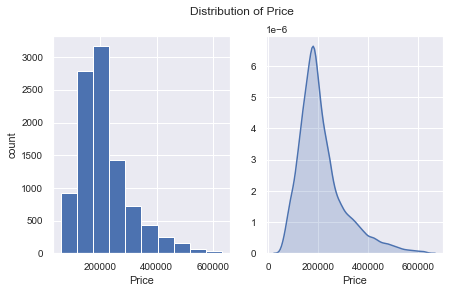

In [2975]:
plt.figure(figsize = (7, 4))

plt.subplot(121)
df['Price'].hist()  
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False) 
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [2976]:
target_mean = round(train['Price'].mean(), 2)
target_median = round(train['Price'].median(), 2)
target_mode = train['Price'].mode() [0]

print("Среднее, медиана, мода:", target_mean, target_median, target_mode)

Среднее, медиана, мода: 214112.09 192277.33 182938.08


In [2977]:
train['Price'].value_counts()

204576.421875    2
238608.656250    2
298194.500000    2
182938.078125    2
123564.445312    1
                ..
341186.593750    1
182951.359375    1
174758.687500    1
212894.546875    1
167936.046875    1
Name: Price, Length: 9991, dtype: int64

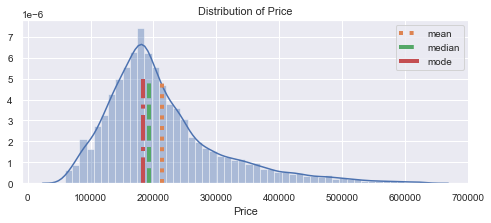

In [2978]:
plt.figure(figsize = (8, 3))

sns.distplot(train['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

### Оценка распредения целевой переменной в разрезе других признаков

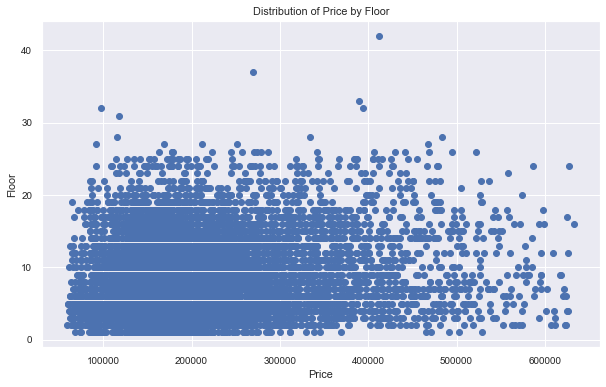

In [2979]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Price'], df['Floor'])

plt.xlabel('Price')
plt.ylabel('Floor')
plt.title('Distribution of Price by Floor')
plt.show()

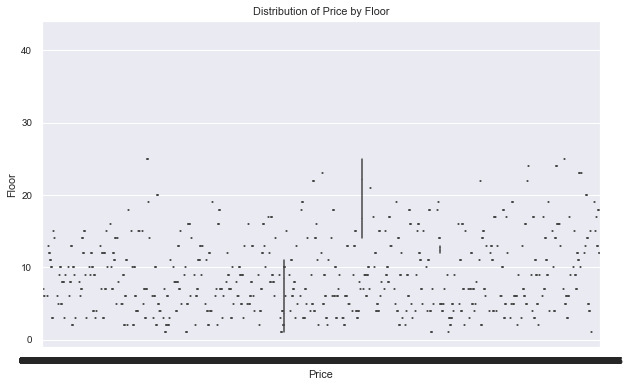

In [2980]:
plt.figure(figsize=(10, 6))

sns.boxplot(df['Price'], df['Floor'])

plt.xlabel('Price')
plt.ylabel('Floor')
plt.title('Distribution of Price by Floor')
plt.show()

**Violin plot**

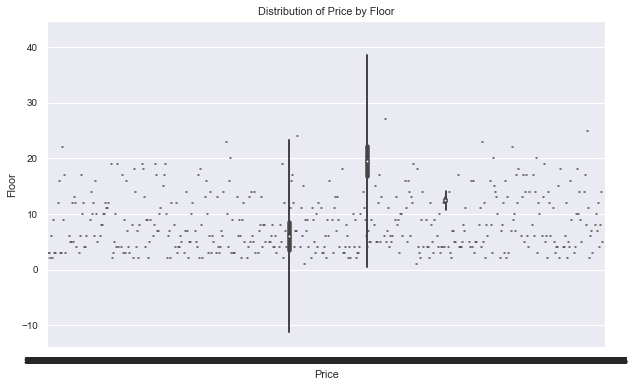

In [2981]:
plt.figure(figsize=(10, 6))

sns.violinplot(df['Price'], df['Floor'])

plt.xlabel('Price')
plt.ylabel('Floor')
plt.title('Distribution of Price by Floor')
plt.show()

### Анализ признаков

**Количественные признаки**

In [2989]:
df_num_features = df.select_dtypes(include=['float64'])

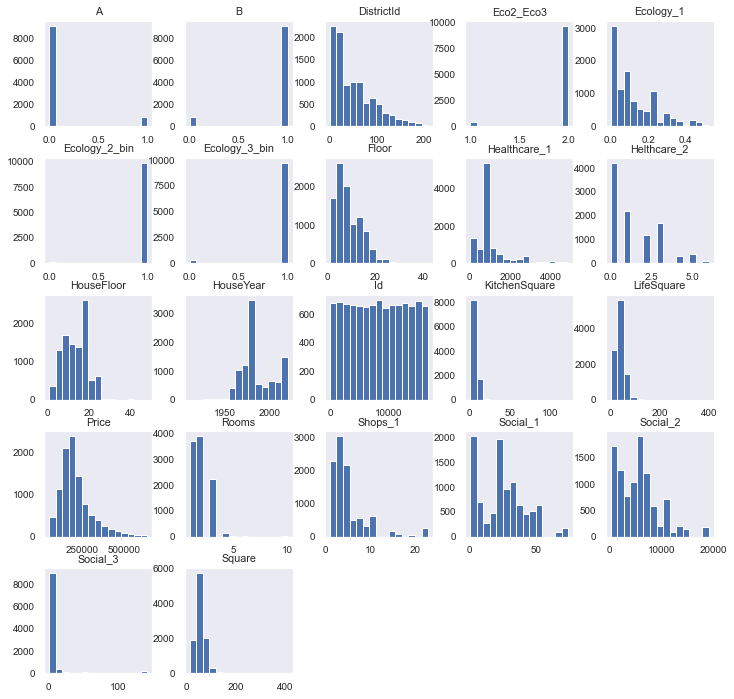

In [2991]:
df_num_features.hist(figsize=(12,12), bins=15, grid=False);

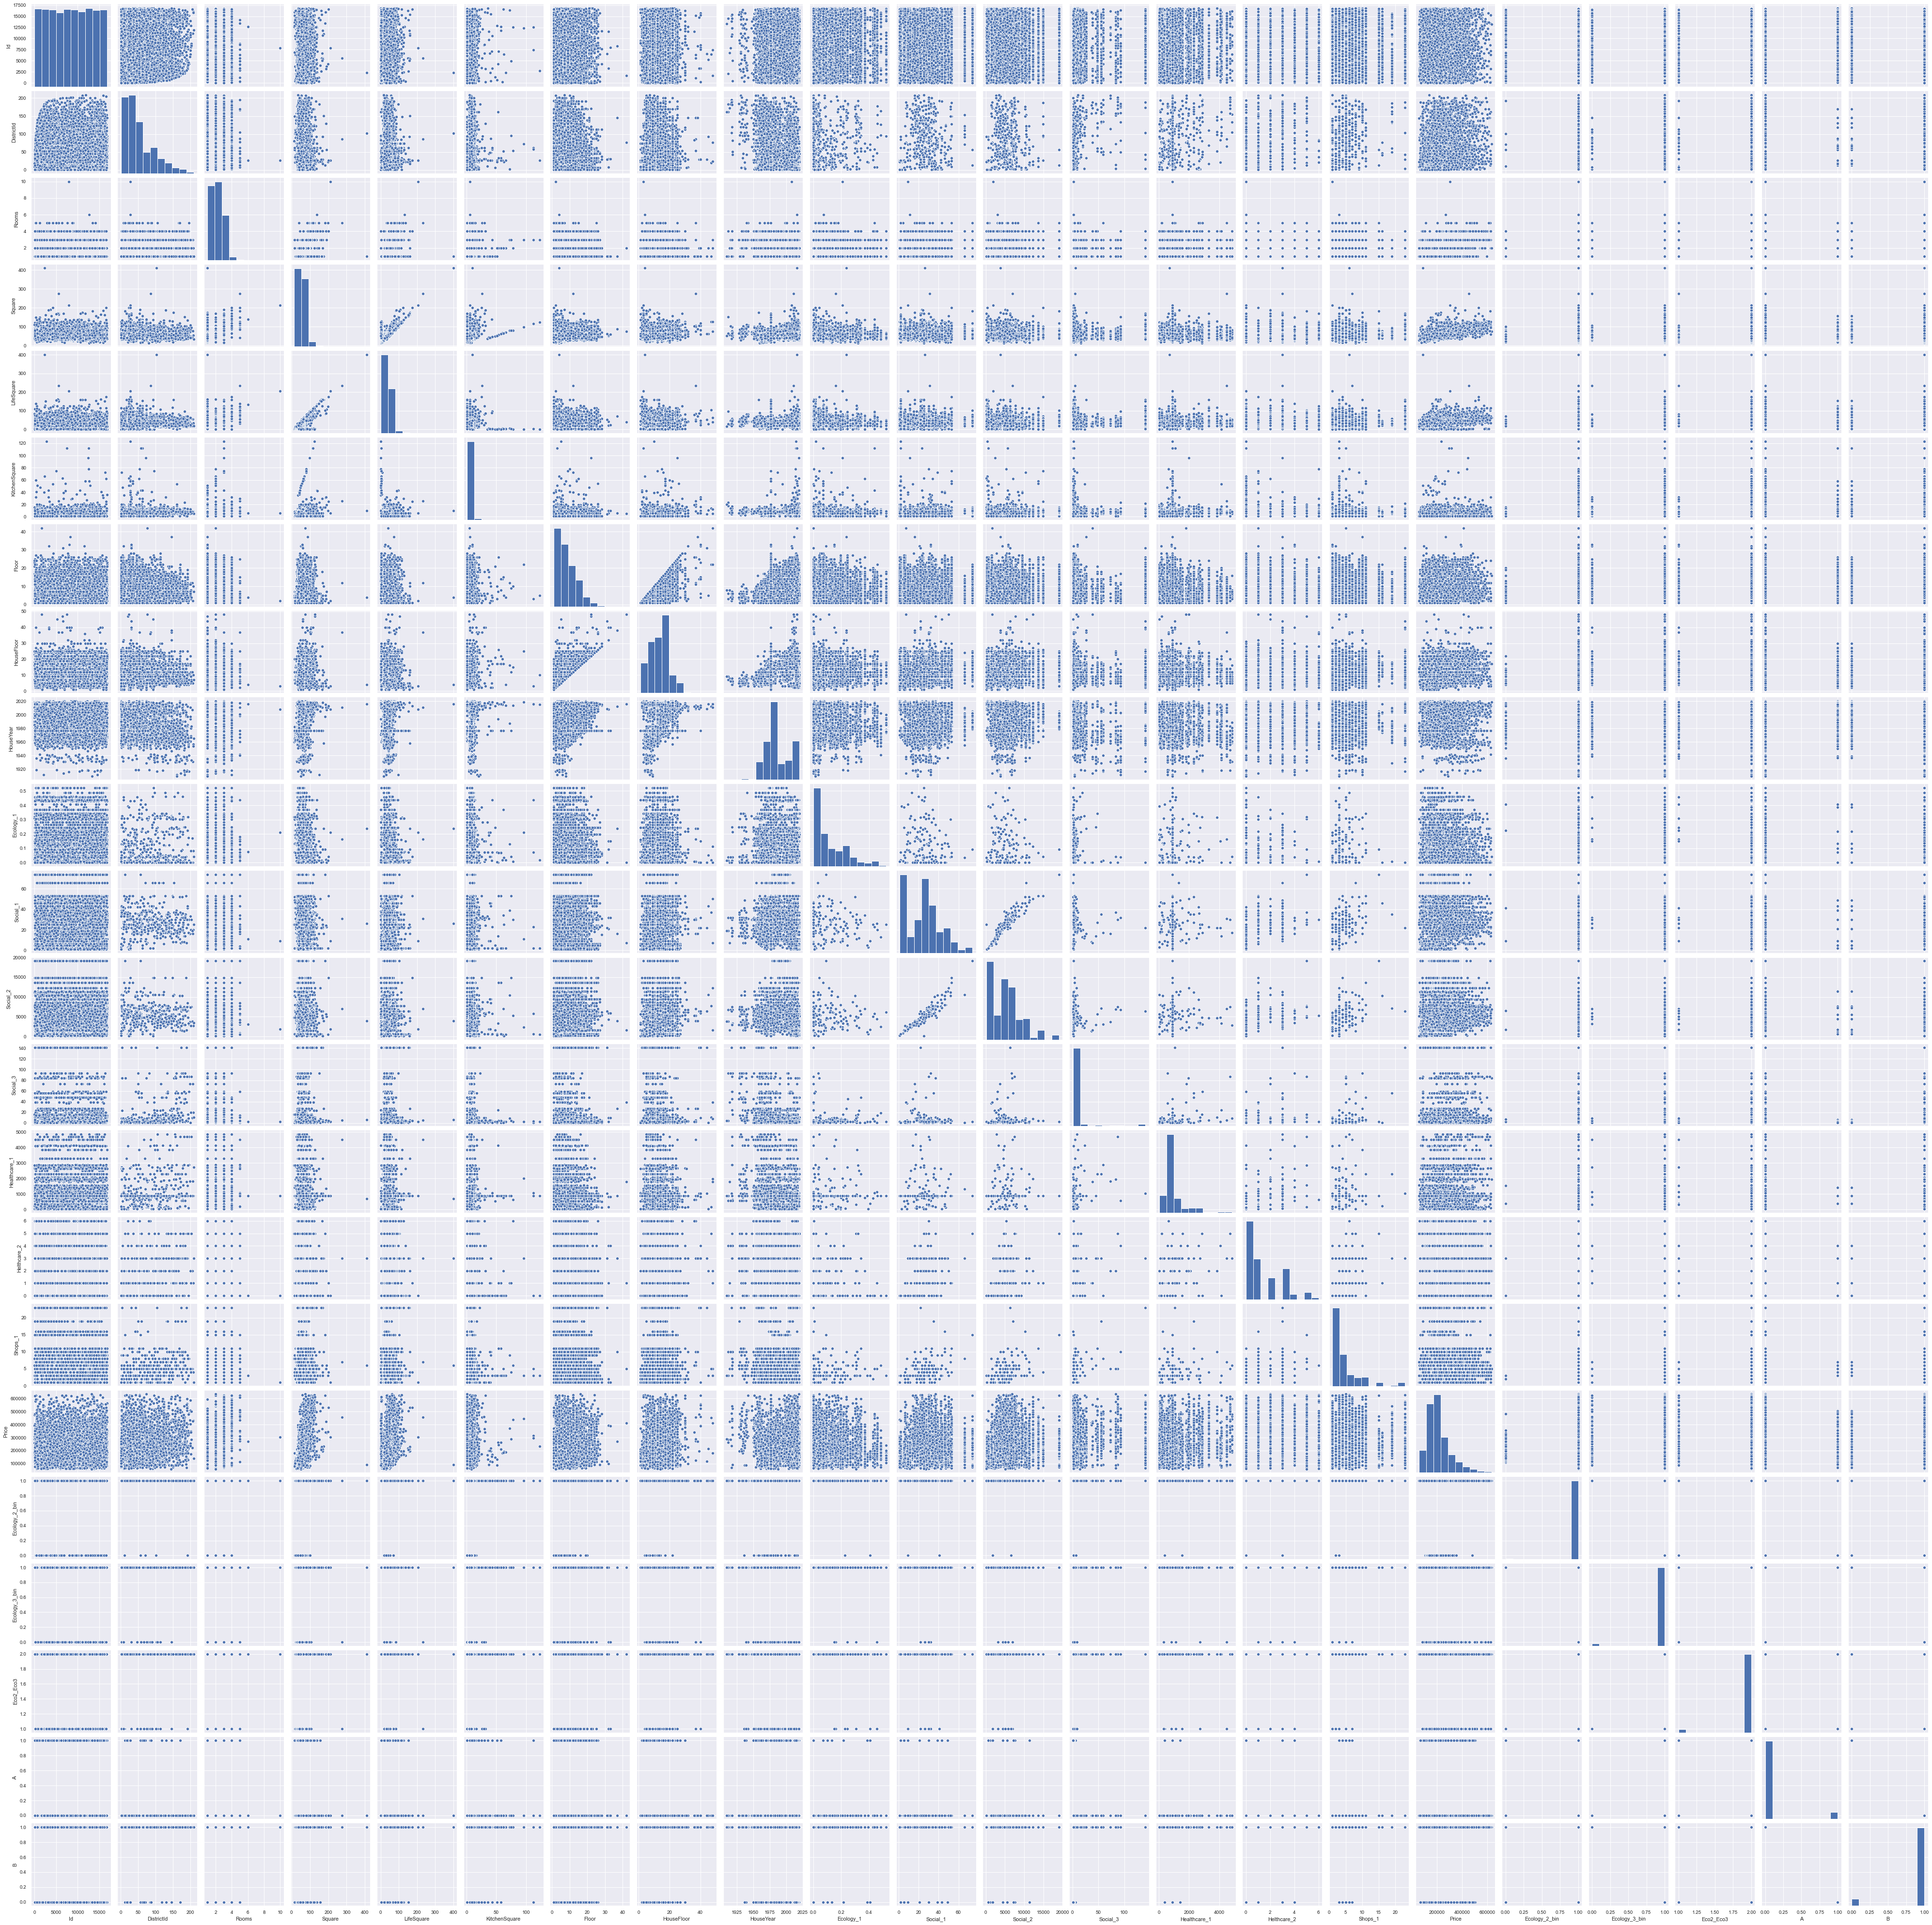

In [2992]:
sns.pairplot(df_num_features);

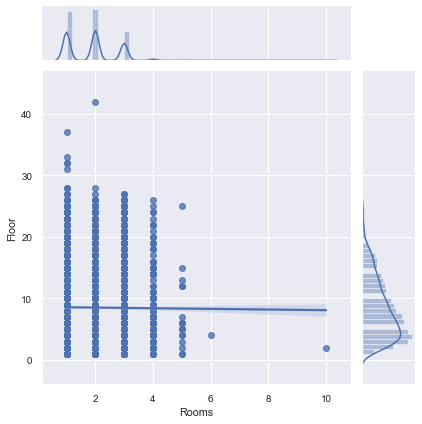

In [2993]:
grid = sns.jointplot(df['Rooms'], df['Floor'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

plt.show()

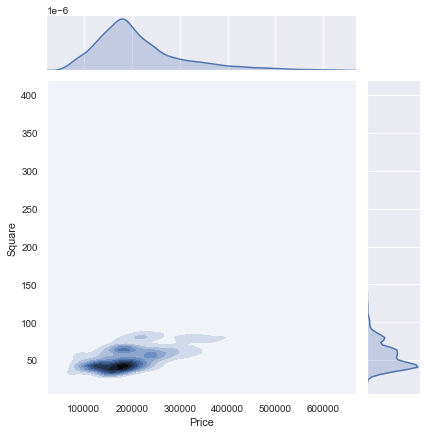

In [2994]:
grid = sns.jointplot(df['Price'], df['Square'], kind='kde')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

plt.show()

Посмотрим корреляцию данных:

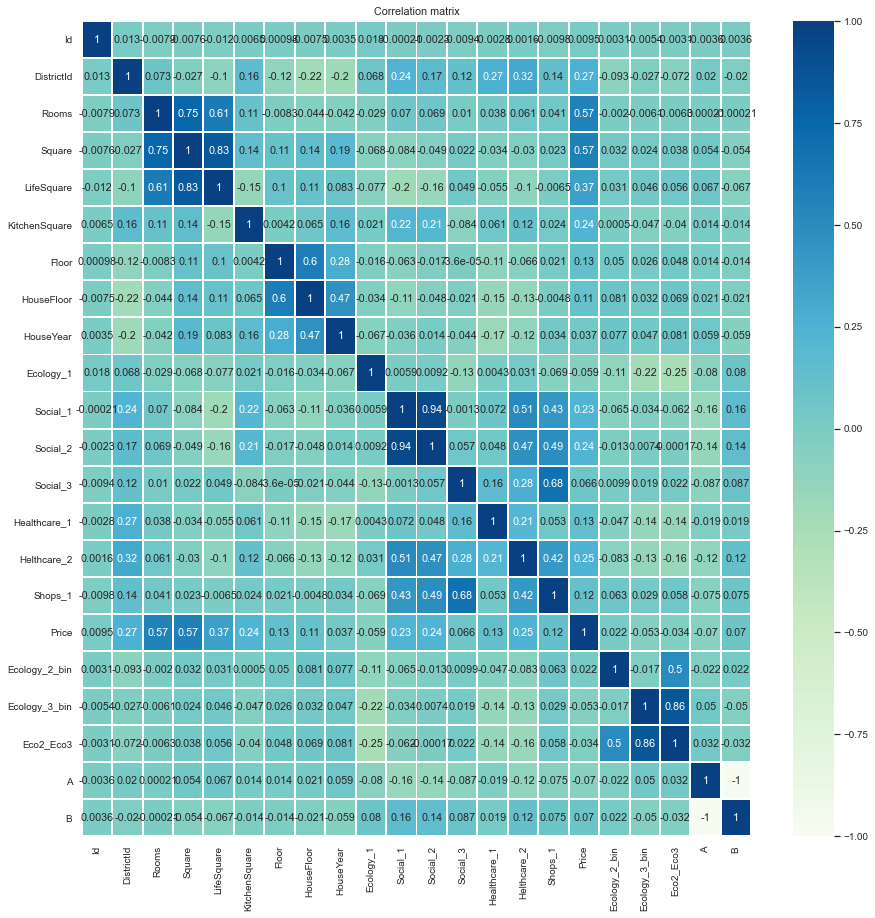

In [2995]:
plt.figure(figsize = (15,15))

sns.set(font_scale=0.9)
sns.heatmap(df.corr(), annot=True, linewidths=.9, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

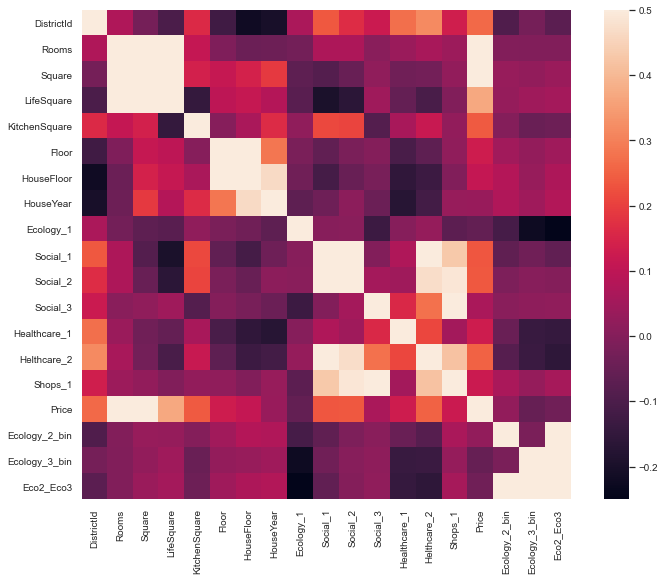

In [3001]:
corrmat = df.loc[:, (df.columns != 'Id')&(train.columns != 'B')&(train.columns != 'A')].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.5, square=True)

Видим наибольшую корреляцию между ценой и площадью квартиры, количеством комнат, а также жилой площадью. 

Среднее влияние на цену оказывают параметры: 
    район,  площадь кухни, социальные показатели местности, показатели местности, связанные с охраной здоровья, с наличием магазинов, торговых центров

Малое влияние на цену оказывают параметры:
    этаж, количество этажей в доме, год строительства
    
Экологические показатели местности практически не влияют на цену, поэтому при прогнозе их можно не учитывать.

Похожую картину мы видим на следующей диаграмме:

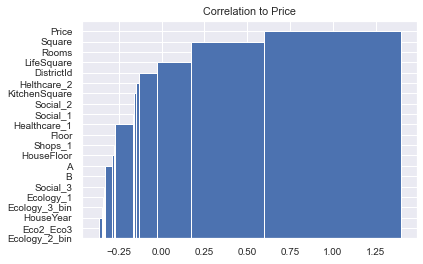

In [3002]:
corrmat = df.loc[:, df.columns != 'Id'].corrwith(
    df['Price']).abs().sort_values(ascending=True)[0:]
plt.bar(corrmat.values, corrmat.index)
plt.title('Correlation to Price')
plt.xticks()
plt.show()

In [3003]:
df.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038        35.0    2.0  47.981560   29.442750            6.0      7   
1  15053        41.0    3.0  65.683640   40.049540            8.0      7   
2   4765        53.0    2.0  44.947952   29.197610            6.0      8   
3   5809        58.0    2.0  53.352980   44.352980            9.0      8   
4  10783        99.0    1.0  39.649193   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1  ...  Social_3  Healthcare_1  Helthcare_2  \
0         9.0       1969   0.089040  ...       5.0         900.0            0   
1         9.0       1978   0.000070  ...       1.0         240.0            1   
2        12.0       1968   0.049637  ...       2.0         229.0            1   
3        17.0       1977   0.437885  ...       3.0        1084.0            0   
4        12.0       1976   0.012339  ...       1.0        2078.0            2   

   Shops_1      Price  Ecology_2_bin  Ecology_3_bin  Eco2_Eco3  A  B  
0     11.0  184966.94              1              1          2  0  1  
1     16.0  300009.44              1              1          2  0  1  
2      3.0  220925.90              1              1          2  0  1  
3      5.0  175616.23              1              1          2  0  1  
4      4.0  150226.53              1              1          2  0  1  

[5 rows x 22 columns]

In [3004]:
df.shape

(9995, 22)

In [3005]:
df.dtypes

Id                 int64
DistrictId       float64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1         float64
Social_2           int64
Social_3         float64
Healthcare_1     float64
Helthcare_2        int64
Shops_1          float64
Price            float64
Ecology_2_bin      int64
Ecology_3_bin      int64
Eco2_Eco3          int64
A                  int64
B                  int64
dtype: object

In [3006]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9995 non-null   int64  
 1   DistrictId     9995 non-null   float64
 2   Rooms          9995 non-null   float64
 3   Square         9995 non-null   float64
 4   LifeSquare     9995 non-null   float64
 5   KitchenSquare  9995 non-null   float64
 6   Floor          9995 non-null   int64  
 7   HouseFloor     9995 non-null   float64
 8   HouseYear      9995 non-null   int64  
 9   Ecology_1      9995 non-null   float64
 10  Social_1       9995 non-null   float64
 11  Social_2       9995 non-null   int64  
 12  Social_3       9995 non-null   float64
 13  Healthcare_1   9995 non-null   float64
 14  Helthcare_2    9995 non-null   int64  
 15  Shops_1        9995 non-null   float64
 16  Price          9995 non-null   float64
 17  Ecology_2_bin  9995 non-null   int64  
 18  Ecology_

**Отбор примеров**

In [3007]:
df['Price'].value_counts().head(10)

298194.500    2
182938.080    2
238608.660    2
204576.420    2
311482.940    1
252808.390    1
156028.380    1
173399.750    1
236117.920    1
115037.086    1
Name: Price, dtype: int64

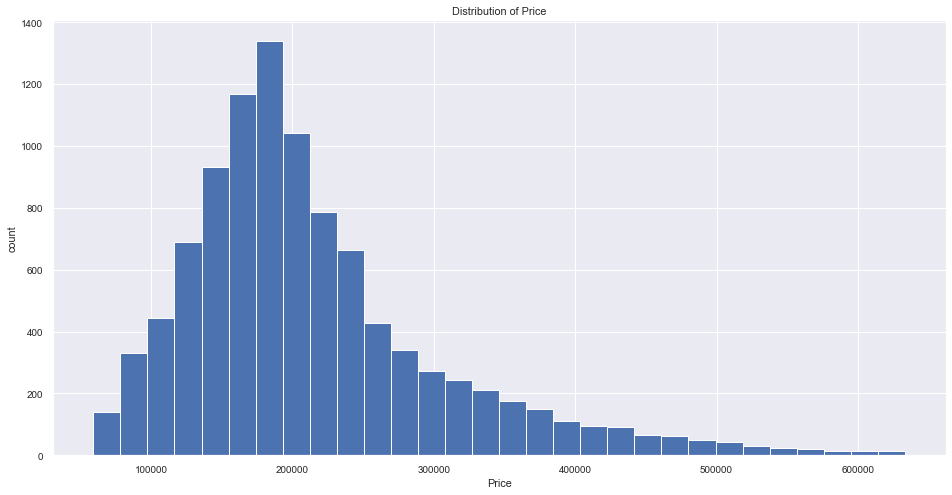

In [3008]:
plt.figure(figsize = (16, 8))

df['Price'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('Price')

plt.title('Distribution of Price')
plt.show()

**Отбор признаков**

Добавим дополнительный параметр:

In [3213]:
medium_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MediumPriceByDistrict'})

medium_price_by_district.head()

DistrictId  Rooms  MediumPriceByDistrict
0         1.0    1.0             146574.015
1         1.0    2.0             202666.315
2         1.0    3.0             244005.270
3         1.0    4.0             277290.720
4         2.0    1.0             174545.975

In [3214]:
medium_price_by_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 666
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DistrictId             667 non-null    float64
 1   Rooms                  667 non-null    float64
 2   MediumPriceByDistrict  667 non-null    float64
dtypes: float64(3)
memory usage: 20.8 KB


In [3017]:
df = df.merge(medium_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038        35.0    2.0  47.981560   29.442750            6.0      7   
1  15053        41.0    3.0  65.683640   40.049540            8.0      7   
2   4765        53.0    2.0  44.947952   29.197610            6.0      8   
3   5809        58.0    2.0  53.352980   44.352980            9.0      8   
4  10783        99.0    1.0  39.649193   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1  ...  Helthcare_2  Shops_1      Price  \
0         9.0       1969   0.089040  ...            0     11.0  184966.94   
1         9.0       1978   0.000070  ...            1     16.0  300009.44   
2        12.0       1968   0.049637  ...            1      3.0  220925.90   
3        17.0       1977   0.437885  ...            0      5.0  175616.23   
4        12.0       1976   0.012339  ...            2      4.0  150226.53   

   Ecology_2_bin  Ecology_3_bin  Eco2_Eco3  A  B  MedPriceByDistrict  \
0              1              1          2  0  1          207786.135   
1              1              1          2  0  1          300009.440   
2              1              1          2  0  1          263206.220   
3              1              1          2  0  1          166809.670   
4              1              1          2  0  1          158539.055   

   MediumPriceByDistrict  
0             207786.135  
1             300009.440  
2             263206.220  
3             166809.670  
4             158539.055  

[5 rows x 24 columns]

In [3018]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Eco2_Eco3',
 'A',
 'B',
 'MedPriceByDistrict',
 'MediumPriceByDistrict']

In [3079]:
feature_names = ['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Social_1',
 'Social_2',
 'Social_3',
 'Shops_1', 'MediumPriceByDistrict', 'Eco2_Eco3']

new_feature_names = ['MediumPriceByDistrict', 'Eco2_Eco3']

target_name = 'Price'

In [3080]:
train_df = df[feature_names +[target_name]]


In [3081]:
train_df.shape

(9995, 15)

In [3082]:
test.shape

(5000, 22)

**Разобьем данные на тренировочный и тестовый датасеты:**

In [3083]:
X = train_df[feature_names]
y = train_df[target_name]

In [3084]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=100)

**Стандартизация признаков**

In [3085]:
train_df.mean()

DistrictId                   50.587594
Rooms                         1.890345
Square                       56.260702
LifeSquare                   38.160933
KitchenSquare                 6.281941
Floor                         8.527864
HouseFloor                   13.539270
HouseYear                  1984.866233
Social_1                     25.193697
Social_2                   5352.715858
Social_3                      8.641321
Shops_1                       4.926563
MediumPriceByDistrict    211553.475774
Eco2_Eco3                     1.962781
Price                    214111.711833
dtype: float64

In [3087]:
feature_names_for_stand = train_df[feature_names].select_dtypes(include=['float64', 'int64']).columns.tolist()
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Social_1',
 'Social_2',
 'Social_3',
 'Shops_1',
 'MediumPriceByDistrict',
 'Eco2_Eco3']

In [3088]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(train_df[feature_names_for_stand])

In [3089]:
train_df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [3090]:
train_df.head()

DistrictId     Rooms    Square  LifeSquare  KitchenSquare     Floor  \
0   -0.358656  0.134254 -0.426912   -0.466147      -0.058612 -0.291616   
1   -0.220601  1.358587  0.485892    0.100981       0.357165 -0.291616   
2    0.055507  0.134254 -0.583340   -0.479254      -0.058612 -0.100751   
3    0.170552  0.134254 -0.149936    0.331078       0.565053 -0.100751   
4    1.113923 -1.090079 -0.856569   -0.769129       0.149276  0.471845   

   HouseFloor  HouseYear  Social_1  Social_2  Social_3   Shops_1  \
0   -0.785434  -0.861706  0.454672  0.654849 -0.153961  1.399877   
1   -0.785434  -0.372910  1.211846  1.237235 -0.323087  2.552336   
2   -0.266341  -0.916017  0.512916  0.600679 -0.280806 -0.444057   
3    0.598814  -0.427221 -0.127770  0.095429 -0.238524  0.016927   
4   -0.266341  -0.481531  0.571160  0.105664 -0.323087 -0.213565   

   MediumPriceByDistrict  Eco2_Eco3      Price  
0              -0.049214   0.196615  184966.94  
1               1.155529   0.196615  300009.44  
2               0.674756   0.196615  220925.90  
3              -0.584503   0.196615  175616.23  
4              -0.692544   0.196615  150226.53

In [3091]:
train_df.mean()

DistrictId               1.892989e-16
Rooms                   -4.979397e-16
Square                   9.684877e-17
LifeSquare              -3.717775e-16
KitchenSquare           -1.900431e-16
Floor                   -1.995014e-16
HouseFloor              -1.448455e-17
HouseYear               -1.523316e-15
Social_1                -1.486083e-17
Social_2                -1.340793e-16
Social_3                -2.589391e-16
Shops_1                  4.619727e-17
MediumPriceByDistrict   -5.793820e-17
Eco2_Eco3               -8.216372e-16
Price                    2.141117e+05
dtype: float64

In [3092]:
train_df.std()

DistrictId                   1.000050
Rooms                        1.000050
Square                       1.000050
LifeSquare                   1.000050
KitchenSquare                1.000050
Floor                        1.000050
HouseFloor                   1.000050
HouseYear                    1.000050
Social_1                     1.000050
Social_2                     1.000050
Social_3                     1.000050
Shops_1                      1.000050
MediumPriceByDistrict        1.000050
Eco2_Eco3                    1.000050
Price                    92828.518754
dtype: float64

Алгоритм t-SNE

_t-distributed Stochastic Neighbor Embedding_ или _Стохастическое вложение соседей с t-распределением_ позволяет понижать размерность данных до двух или трёх измерений, что позволяет визуализировать данные на двумерных и трёхмерных графиках. Изучая графики, можно, например, понять, на сколько кластеров адекватно разбивать данные, а также оценить уже выполненное разбиение на кластеры.

Зададим параметр `n_components=2`, чтобы получить данные с двумя признаками. 
Параметр `learning_rate` влияет на то, как плотно будут располагаться точки. 
Рекомендуется задавать его в диапазоне от 10 до 1000.

In [3093]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [3094]:
X_train_tsne = tsne.fit_transform(train_df[feature_names_for_stand])

In [3095]:
print('До:\t{}'.format(train_df[feature_names_for_stand].shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(9995, 14)
После:	(9995, 2)


Мы видим, что число признаков уменьшилось с 10 до 2. Теперь можно визуализировать наши данные на плоскости.

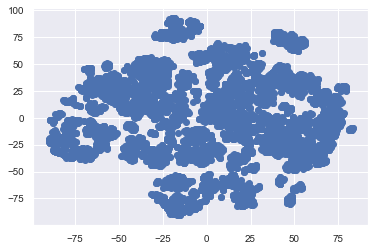

In [3096]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

По графику видно, что данные можно разбить как минимум на 2 кластера. Попробуем сделать это с помощью уже известного нам метода K-means и ещё раз построим график, но уже с полученными метками кластеров.



In [3097]:
kmeans = KMeans(n_clusters=2)

labels_train = kmeans.fit_predict(train_df[feature_names_for_stand])


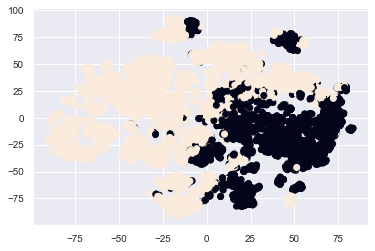

In [3098]:

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Как мы видим, при кластеризации мы получили практически такое же разбиение, как то, которое можно было наблюдать в результате t-SNE.

Для тестовой выборки получить аналогичный график нам не удастся, поскольку у алгоритма t-SNE нет метода `.transform`. Однако, с помощью алгоритма K-means мы можем получить метки кластеров для тестовой выборки с помощью метода `.predict` и использовать их:

Давайте посмотрим на объекты из разных кластеров, чтобы попытаться понять, почему алгоритм t-SNE выделил две группы. Например, посмотрим на среднюю цену недвижимости во всей выборке и в отдельных кластерах.



In [3099]:
labels_test = kmeans.predict(stand_features)

In [3100]:
y_train.mean()

214928.94372702952

Понизим размерность данных

In [3101]:
from sklearn.decomposition import PCA

In [3102]:
pca = PCA(n_components=1)

получим матрицу объект-признак

In [3103]:
result_ = pca.fit_transform(df)

print(result_)

[[ -22615.98062677]
 [ 151207.53590594]
 [  60738.06765398]
 ...
 [-136753.21821737]
 [ -46422.33004349]
 [ -32858.41729505]]


Кроме того, использование модели из `sklearn` позволяет нам также посмотреть, какую долю объяснённой дисперсии содержит данная главная компонента:


In [3104]:
pca.explained_variance_ratio_

array([0.89597235])

Мы видим, что это значение близко к 1. Это означает, что мы потеряли менее 1 процента информации. В общем случае, потеря информации до 10 процентов считается не очень большой.

Обучающий датасет готов

**Сохраним обработанные данные в файл**

In [3105]:
train_df.to_csv('/Users/ekaterina/Downloads/project_task/train_to_learn.csv', index=False, encoding='utf-8')

## Построение базовых моделей и выбор лучшей

Загрузим метрики

MAE - Mean Absolute Error 

MSE - Mean Squared Error

RMSE - Root Mean Squared Error

R2 - coefficient of determination

In [3106]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from math import sqrt

In [3107]:
def evaluate_preds(true_values, pred_values):
    print("R2 (Характеризует степень сходства исходных данных и предсказанных, чем ближе к 1, тем лучше):\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE (измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением):\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE (чем ближе к нулю, тем модель лучше):\t" + str(round(mse(true_values, pred_values), 3)) + "\n" +
          "RMSE (корень от квадрата ошибки):\t" + str(round(sqrt(mse(true_values, pred_values)), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()
    return None

In [3108]:
def evaluate_preds_sec(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(train_true_values, train_pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(train_true_values, train_pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(sqrt(mse(train_true_values, train_pred_values)), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(test_true_values, test_pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(test_true_values, test_pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(sqrt(mse(test_true_values, test_pred_values)), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

## Построим модель линейной регрессии:

In [3109]:
lr_model = LinearRegression()

In [3110]:
lr_model.fit(X, y)

LinearRegression()

Train R2:	0.705
MAE:	32396.338
MSE:	2593169543.896
RMSE:	50923.173
Test R2:	0.509
MAE:	44053.899
MSE:	4097518611.28
RMSE:	64011.863


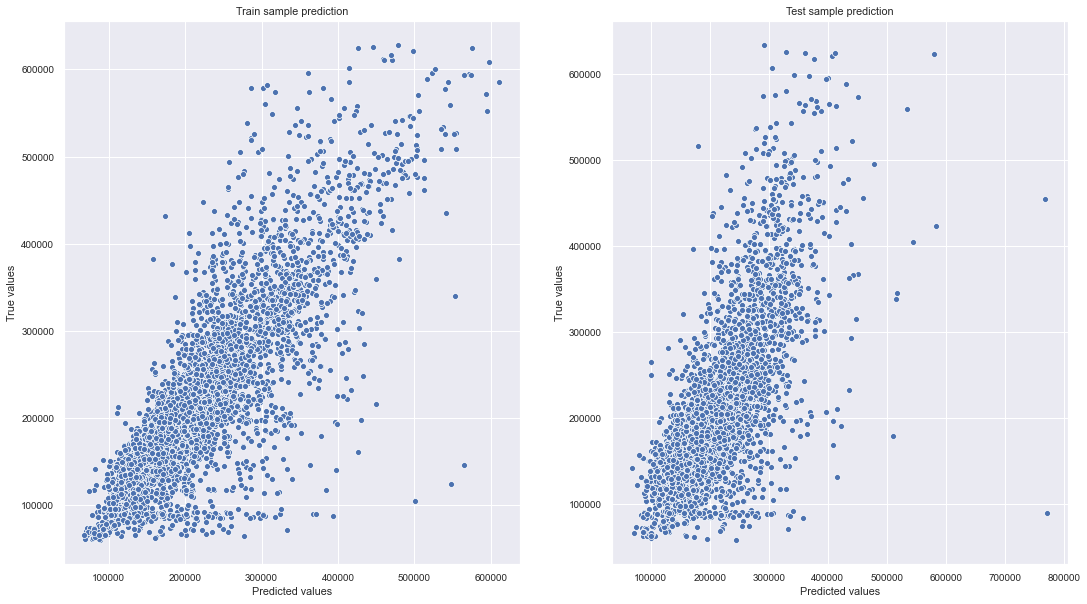

In [3111]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds_sec(y_train, y_train_preds, y_test, y_test_preds)

R2 (Характеризует степень сходства исходных данных и предсказанных, чем ближе к 1, тем лучше):	0.684
MAE (измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением):	32319.123
MSE (чем ближе к нулю, тем модель лучше):	2634922894.66
RMSE (корень от квадрата ошибки):	51331.5


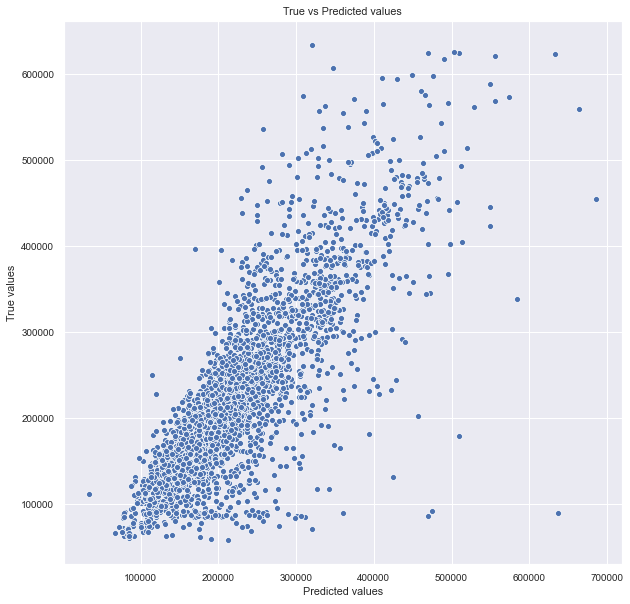

In [3112]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

визуализируем то, какой вклад вносит каждый из коэффициентов:

In [3113]:
lr_model.intercept_

222824.05571971583

In [3114]:
lr_model.coef_

array([ 1.21290274e+02, -1.82055691e+04,  2.02246544e+03, -5.20229930e+02,
        4.25765265e+02,  9.25246442e+02,  1.28559580e+03, -1.36775472e+02,
        4.63629360e+02,  4.76352622e-01,  2.40551867e+02, -1.64364151e+03,
        8.15509447e-01, -5.90568168e+03])

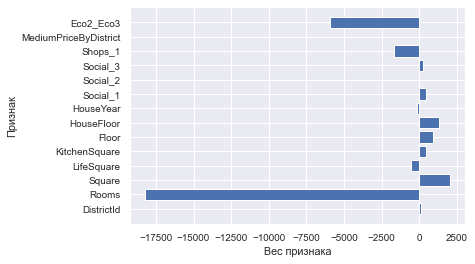

In [3115]:
plt.barh(feature_names, lr_model.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.show()

## Random Forest Regressor

In [3116]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

Train R2:	0.966
MAE:	10310.977
MSE:	303030321.993
RMSE:	17407.766
Test R2:	0.684
MAE:	32319.123
MSE:	2634922894.66
RMSE:	51331.5


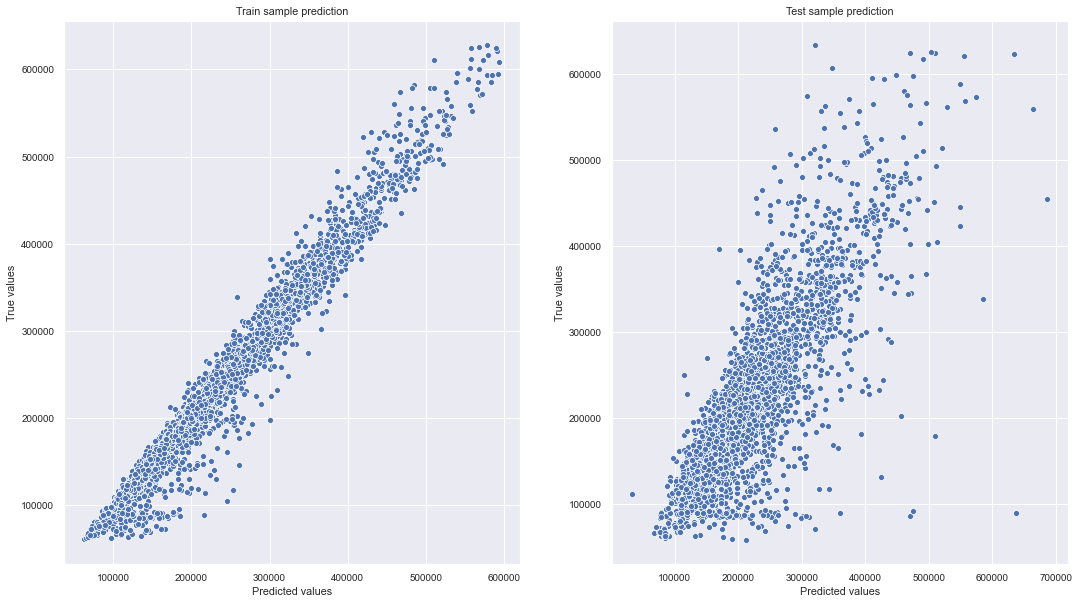

In [3117]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds_sec(y_train, y_train_preds, y_test, y_test_preds)

R2 (Характеризует степень сходства исходных данных и предсказанных, чем ближе к 1, тем лучше):	0.747
MAE (измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением):	27316.807
MSE (чем ближе к нулю, тем модель лучше):	2112533495.903
RMSE (корень от квадрата ошибки):	45962.305


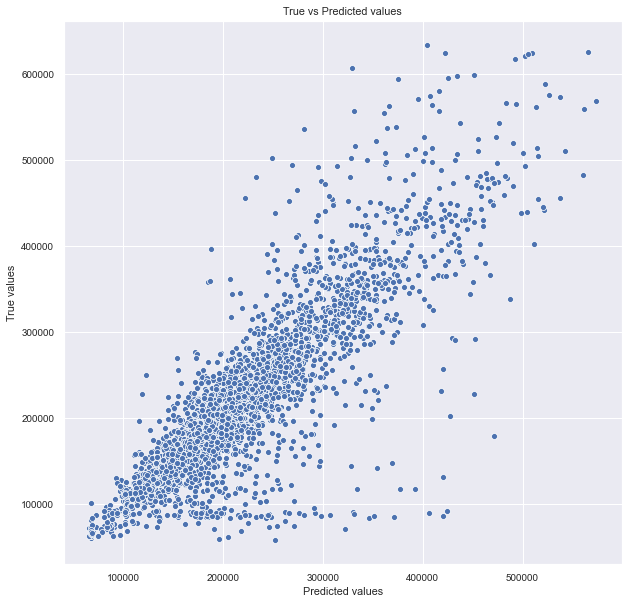

In [3118]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

**Отложенная выборка**

Train R2:	0.966
MAE:	10310.977
MSE:	303030321.993
RMSE:	17407.766
Test R2:	0.747
MAE:	27316.807
MSE:	2112533495.903
RMSE:	45962.305


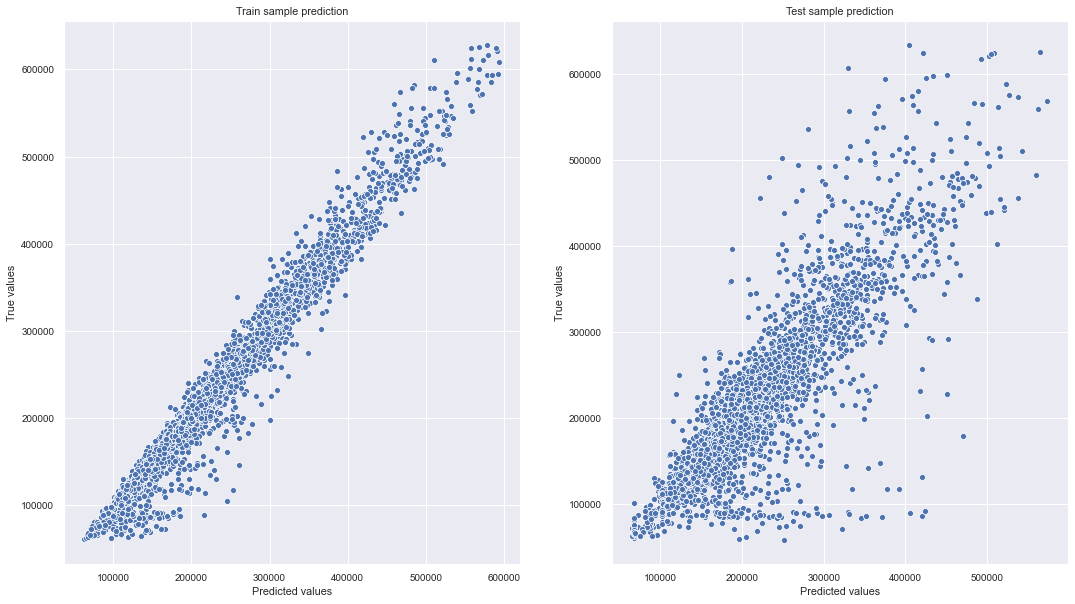

In [3119]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds_sec(y_train, y_train_preds, y_test, y_test_preds)

**Перекрёстная проверка (кросс-валидация)**

In [3120]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score

array([0.76054522, 0.74158898, 0.76452016, 0.77038256, 0.73886669])

In [3121]:
cv_score.mean(), cv_score.std()

(0.7551807209781888, 0.012633144663681328)

In [3122]:

cv_score.mean() - cv_score.std(), cv_score.mean() + cv_score.std()

(0.7425475763145074, 0.7678138656418702)

**Важность признаков**

In [3123]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

In [3124]:
feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
12  MediumPriceByDistrict    0.635304
2                  Square    0.115529
3              LifeSquare    0.033098
6              HouseFloor    0.032846
7               HouseYear    0.028361
5                   Floor    0.026652
10               Social_3    0.025832
4           KitchenSquare    0.024591
9                Social_2    0.023712
0              DistrictId    0.021755
8                Social_1    0.014373
11                Shops_1    0.011499
1                   Rooms    0.005593
13              Eco2_Eco3    0.000854

## Gradient Boosting Regressor

In [3125]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

Train R2:	0.792
MAE:	27388.727
MSE:	1832434905.822
RMSE:	42806.949
Test R2:	0.747
MAE:	27316.807
MSE:	2112533495.903
RMSE:	45962.305


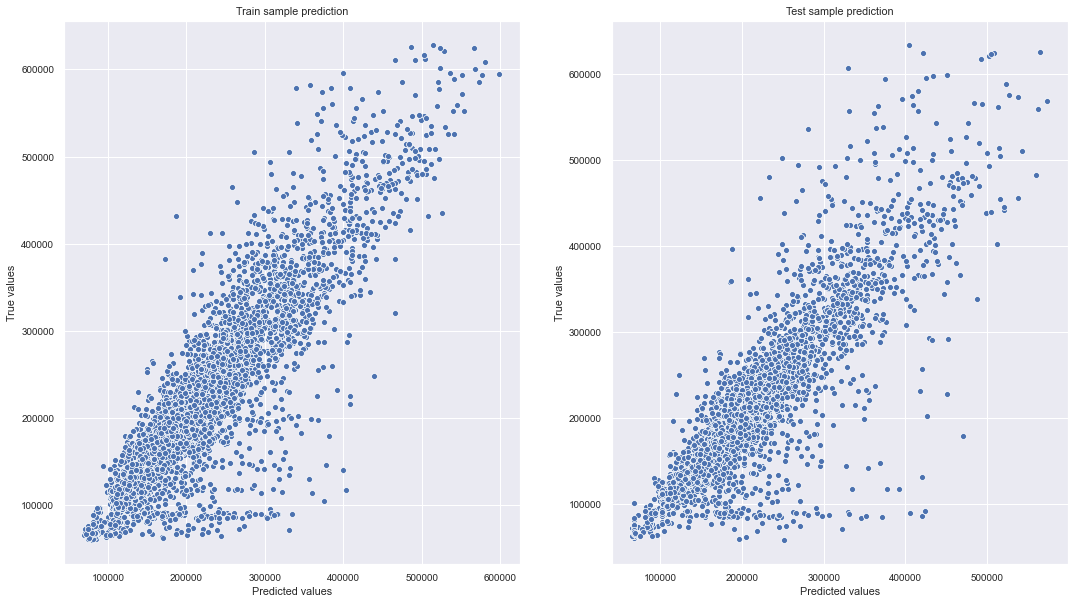

In [3126]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds_sec(y_train, y_train_preds, y_test, y_test_preds)

R2 (Характеризует степень сходства исходных данных и предсказанных, чем ближе к 1, тем лучше):	0.738
MAE (измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением):	29054.821
MSE (чем ближе к нулю, тем модель лучше):	2187074537.15
RMSE (корень от квадрата ошибки):	46766.169


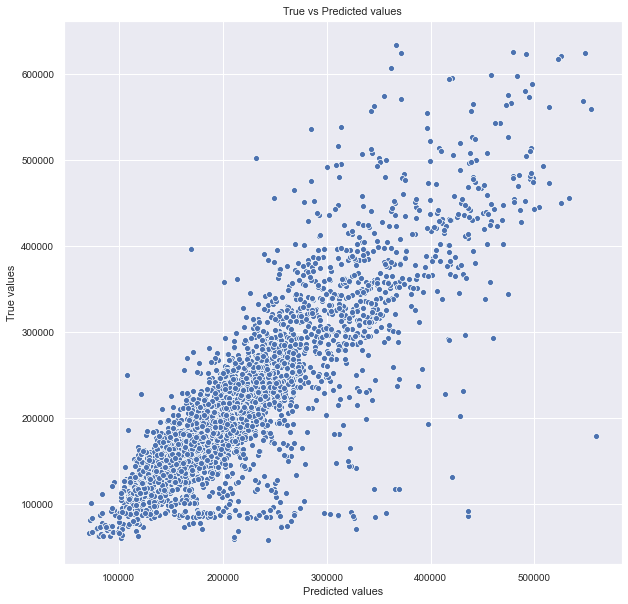

In [3127]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

**Перекрёстная проверка (кросс-валидация)**

In [3128]:
cv_score = cross_val_score(gb_model, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score

array([0.74035371, 0.73288206, 0.75341426, 0.76029532, 0.73078725])

In [3129]:
cv_score.mean(), cv_score.std()

(0.7435465197183164, 0.011529253477851375)

In [3130]:

cv_score.mean() - cv_score.std(), cv_score.mean() + cv_score.std()

(0.732017266240465, 0.7550757731961678)

**Важность признаков**

In [3131]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

In [3132]:
feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
12  MediumPriceByDistrict    0.744886
2                  Square    0.128146
6              HouseFloor    0.027705
9                Social_2    0.020173
10               Social_3    0.019118
4           KitchenSquare    0.016703
7               HouseYear    0.014500
5                   Floor    0.009026
1                   Rooms    0.004682
3              LifeSquare    0.004564
8                Social_1    0.004462
0              DistrictId    0.003994
11                Shops_1    0.002041
13              Eco2_Eco3    0.000000

Gradient Boosting Regressor выдает самые высокие показатели, выбираем ее в качестве финальной модели

## Настройка и оценка финальной модели

Подбор гиперпараметров

In [3133]:
0.6*X_train.shape[1]

8.4

In [3134]:
gb_model = GradientBoostingRegressor(random_state=21)
gb_model

GradientBoostingRegressor(random_state=21)

In [3135]:
rf_model = RandomForestRegressor(random_state=21)
rf_model

RandomForestRegressor(random_state=21)

параметры модели:

n_estimators - число деревьев в ансамбле

max_features - максимальное число признаков, которое может быть использовано при построении каждого дерева

max_depth - максимальная глубина дерева

Зададим сетку параметров, по которой мы хотели бы провести поиск:

parameters = { 'n_estimators': [150, 200, 250], 'max_features': np.arange(5, 9), 'max_depth': np.arange(5, 10), }

In [3136]:
params = {'n_estimators':[150, 200, 300, 400], 
          'max_depth':[3, 4, 5, 6]}

Обучим модель на тренировочном наборе данных

In [3137]:
gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=21, shuffle=True), n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [150, 200, 300, 400]},
             scoring='r2')

`GridSearchCV` - это классификатор, который строится на основе модели `estimator`, пробегая все комбинации значений из `param_grid`. Для каждой комбинации параметров по кросс-валидации на указанном количестве _фолдов_ считается метрика, указанная в `scoring`. Наконец, выбирается та комбинация параметров, при которой выбранная метрика оказалась максимальной, и дальше для предсказания используется именно этот набор параметров.

In [3139]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 150}

In [3141]:
gs.best_score_

0.7476819416557524

In [3138]:
#gsrf = GridSearchCV(rf_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=42, shuffle=True), n_jobs=-1)
#gsrf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [150, 200, 300, 400]},
             scoring='r2')

In [3140]:
#gsrf.best_params_

{'max_depth': 6, 'n_estimators': 400}

In [3142]:
#gsrf.best_score_

0.7207667689920679

## Обучение и оценка модели

In [3143]:
final_model = GradientBoostingRegressor(n_estimators=150, max_depth=6, random_state=42)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=150, random_state=42)

R2 (Характеризует степень сходства исходных данных и предсказанных, чем ближе к 1, тем лучше):	0.938
MAE (измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением):	15950.665
MSE (чем ближе к нулю, тем модель лучше):	546117712.339
RMSE (корень от квадрата ошибки):	23369.162


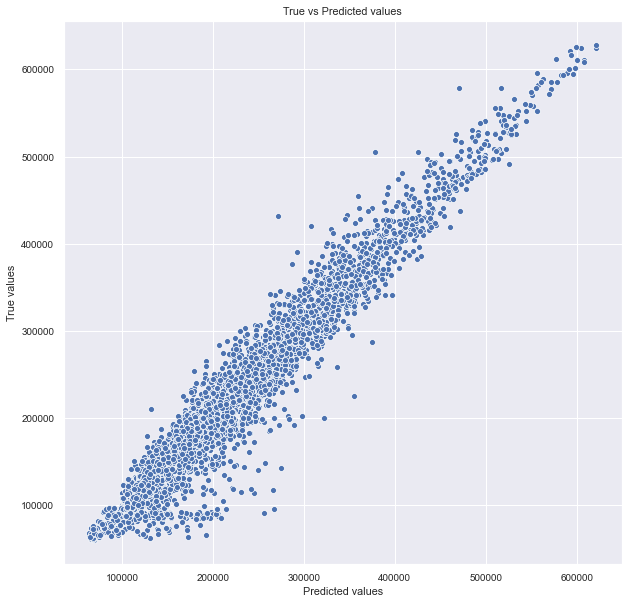

In [3147]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2 (Характеризует степень сходства исходных данных и предсказанных, чем ближе к 1, тем лучше):	0.758
MAE (измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением):	27145.359
MSE (чем ближе к нулю, тем модель лучше):	2024169131.45
RMSE (корень от квадрата ошибки):	44990.767


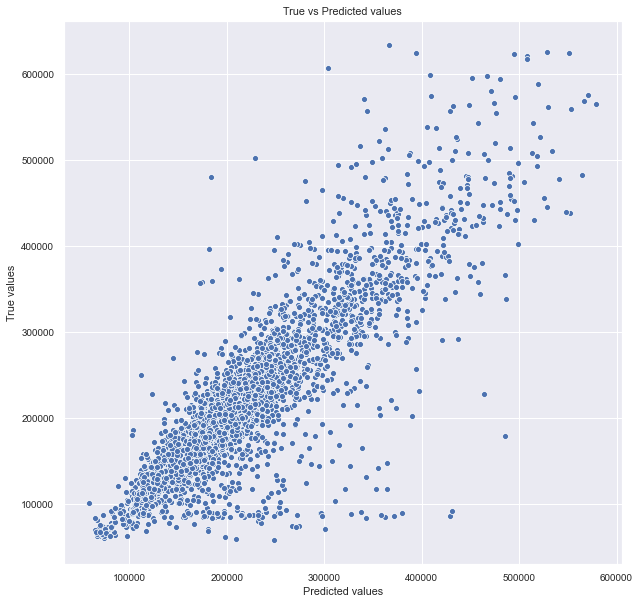

In [3148]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

# R2 финальной модели 0.758
Значит, что данная модель предсказывает целевую переменную с высокой степенью вероятности.

**Важность признаков**

In [3146]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
12  MediumPriceByDistrict    0.663287
2                  Square    0.115329
6              HouseFloor    0.032538
3              LifeSquare    0.029402
7               HouseYear    0.024662
10               Social_3    0.024317
9                Social_2    0.022505
4           KitchenSquare    0.022453
0              DistrictId    0.019889
5                   Floor    0.016501
8                Social_1    0.011797
11                Shops_1    0.010604
1                   Rooms    0.006256
13              Eco2_Eco3    0.000460

Сохранение модели

**Scaler**

In [3149]:
train_df.to_csv('/Users/ekaterina/Downloads/project_task/scaler.pkl')

In [3150]:
with open('/Users/ekaterina/Downloads/project_task/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [3151]:
with open('/Users/ekaterina/Downloads/project_task/scaler.pkl', "rb") as file:
    new_scaler = pickle.load(file)

**Model**

In [3152]:
train_df.to_csv('/Users/ekaterina/Downloads/project_task/model.pkl')

In [3153]:
with open('/Users/ekaterina/Downloads/project_task/model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

**Результат:**

In [3222]:
test_df = pd.read_csv('/Users/ekaterina/Downloads/project_task/test_prepared.csv')

In [3223]:
test_df.shape

(5000, 22)

## Предскажем цены на квартиры:

In [3211]:
medium_price_by_district.head()

DistrictId  Rooms  MediumPriceByDistrict
0         1.0    1.0             146574.015
1         1.0    2.0             202666.315
2         1.0    3.0             244005.270
3         1.0    4.0             277290.720
4         2.0    1.0             174545.975

In [3212]:
medium_price_by_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 666
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DistrictId             667 non-null    float64
 1   Rooms                  667 non-null    float64
 2   MediumPriceByDistrict  667 non-null    float64
dtypes: float64(3)
memory usage: 20.8 KB


In [3232]:
test_df.merge(medium_price_by_district, on=['DistrictId', 'Rooms'], how='left').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     5000 non-null   int64  
 1   DistrictId             5000 non-null   float64
 2   Rooms                  5000 non-null   float64
 3   Square                 5000 non-null   float64
 4   LifeSquare             5000 non-null   float64
 5   KitchenSquare          5000 non-null   float64
 6   Floor                  5000 non-null   int64  
 7   HouseFloor             5000 non-null   float64
 8   HouseYear              5000 non-null   int64  
 9   Ecology_1              5000 non-null   float64
 10  Social_1               5000 non-null   float64
 11  Social_2               5000 non-null   int64  
 12  Social_3               5000 non-null   float64
 13  Healthcare_1           5000 non-null   float64
 14  Helthcare_2            5000 non-null   int64  
 15  Shop

In [3226]:
test_df.shape

(5000, 22)

In [3227]:
test_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Eco2_Eco3',
 'A',
 'B',
 'Eco2_Eco3.1']

In [3233]:
feature_names = ['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Social_1',
 'Social_2',
 'Social_3',
 'Shops_1', 'Eco2_Eco3', 'MediumPriceByDistrict']

new_feature_names = ['MediumPriceByDistrict', 'Eco2_Eco3']

target_name = 'Price'

In [3234]:
test_df = test_df[feature_names]

In [3235]:
train_df.shape

(9995, 15)

In [3236]:
test_df.shape

(5000, 14)

In [3237]:
train_df.shape[1]-1 == test_df.shape[1]

True

In [3197]:
price_predicted = final_model.predict(test_df)
price_predicted

array([196692.73253345, 268612.78322104, 228829.92160573, ...,
       140302.45456216, 168924.63872352, 193395.30004959])

In [3238]:
test_df['Price'] = final_model.predict(test_df)

In [3199]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DistrictId             9995 non-null   float64
 1   Rooms                  9995 non-null   float64
 2   Square                 9995 non-null   float64
 3   LifeSquare             9995 non-null   float64
 4   KitchenSquare          9995 non-null   float64
 5   Floor                  9995 non-null   int64  
 6   HouseFloor             9995 non-null   float64
 7   HouseYear              9995 non-null   int64  
 8   Social_1               9995 non-null   float64
 9   Social_2               9995 non-null   int64  
 10  Social_3               9995 non-null   float64
 11  Shops_1                9995 non-null   float64
 12  MediumPriceByDistrict  9995 non-null   float64
 13  Eco2_Eco3              9995 non-null   int64  
 14  Price                  9995 non-null   float64
dtypes: f

In [3190]:
test_features = list(X_train.columns)

In [3192]:
test_df[test_features].info()

KeyError: "['MediumPriceByDistrict'] not in index"

In [99]:
test['Price'] = final_model.predict(test[test_features])

NameError: name 'best_model' is not defined

## Выгрузка данных:

In [ ]:
test[['Id', 'Price']].to_csv('/Users/ekaterina/Downloads/project_task/Macerszmidt_predictions.csv', index=None)